# ***An Exploratory Analysis of Rat Sightings In NYCs 5 Boroughs:***

 Creation of sets for further EDA
Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Is there a correlation between the frequency of DSNY collection and the affect on the number of sightings?

Types of collections and the reported sightings.

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

Litter baskets.

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---Original data sourced from:

 https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe


> *additional sources added upon completion of ReadMe.txt master repository creation*


###Initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)






Neighborhoods to zips

* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

**series count weekday**
Monday = 0

Tuesday = 1

Wednesday = 2, and so on

#Import

In [1]:
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import geopy #ploting by location longitude and latitude
from math import pi
#from geopy.geocoders import Nominatim as nm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
# #these populated on their own
# from zmq.constants import THREAD_NAME_PREFIX
# from pandas.core.groupby import groupby

# #additional imports from notebook reference
# import plotly as ply
# import plotly.express as px
# import plotly.io as pio
# import scipy as sc
# import sympy as sy
# import matplotlib as matplot
# import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the csv(s)

missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

#EDA DSNY

In [4]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [5]:
print('Rows, Columns:', dsny.shape)

Rows, Columns: (606, 34)


##Cleaning DSNY

In [6]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [7]:
dsny1.sort_values(by=['schedulecode','modzcta', 'post_code']).head(5)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
390,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
392,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
284,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
227,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
560,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [8]:
dsny1_sorted = pd.DataFrame(dsny1.sort_values(by=['schedulecode','modzcta', 'post_code'], ascending=True))

In [9]:
dsny1 = dsny1_sorted.reset_index(drop=True)

<Axes: >

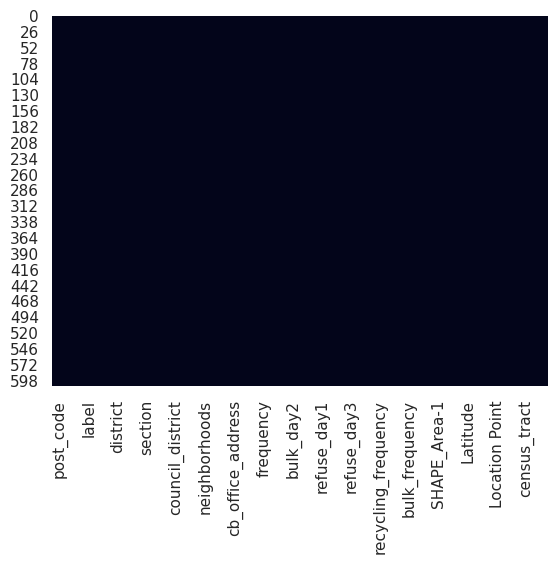

In [10]:
# check missing values in different columns via heatmap
sns.heatmap(dsny1.isnull(), cbar=False)

In [11]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [12]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
1,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
2,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
3,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
4,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [13]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

In [14]:
# Create the 'location' column using latitude and longitude columns
dsny1['location'] = '(' + dsny1['Latitude'].astype(str) + ', ' + dsny1['Longitude'].astype(str) + ')'


In [15]:
dsny1['location'].unique()

array(['(40.713001, -74.004181)', '(40.727881, -73.998557)',
       '(40.726785, -73.990807)', '(40.753099, -73.997704)',
       '(40.751238, -73.973458)', '(40.789078, -73.976245)',
       '(40.763117, -73.969641)', '(40.815433, -73.957204)',
       '(40.809259, -73.948979)', '(40.800223, -73.942564)',
       '(40.839328, -73.939339)', '(40.819717, -73.913373)',
       '(40.820992, -73.891801)', '(40.833189, -73.897021)',
       '(40.843248, -73.910407)', '(40.857857, -73.909343)',
       '(40.845685, -73.893294)', '(40.874409, -73.885314)',
       '(40.906226, -73.904259)', '(40.823018, -73.856686)',
       '(40.837337, -73.834306)', '(40.847348, -73.855711)',
       '(40.89074, -73.858862)', '(40.718173, -73.944994)',
       '(40.69351, -73.987249)', '(40.680186, -73.94593)',
       '(40.684318, -73.909056)', '(40.67588, -73.871091)',
       '(40.686295, -73.994671)', '(40.650316, -74.008166)',
       '(40.673922, -73.926342)', '(40.667628, -73.95072)',
       '(40.624842, -74.02452

#EDA RATS

In [16]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215038 entries, 0 to 215037
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  215038 non-null  int64  
 1   created_date                215038 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 198327 non-null  object 
 4   location_type               215026 non-null  object 
 5   borough                     215036 non-null  object 
 6   incident_zip                215038 non-null  int64  
 7   community_board             215036 non-null  object 
 8   city                        211881 non-null  object 
 9   incident_address            215038 non-null  object 
 10  street_name                 215037 non-null  object 
 11  cross_street _1             196445 non-null  object 
 12  cross_street_2              196451 non-null  object 
 13  intersection_s

In [17]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (215038, 29)


Replacing the double checks(null)s

In [18]:
rats.index.is_unique

True

In [19]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       93913
closed_date                    16711
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            3157
incident_address                   0
street_name                        1
cross_street _1                18593
cross_street_2                 18587
intersection_street_1         117887
intersection_street_2         117848
address_Type                    4444
landmark                      127288
status                             0
X Coordinate (State Plane)      1595
Y Coordinate (State Plane)      1595
latitude                        1595
longitude                       1595
location                        1595
table_count                        0
modztca                         1119
label                           1119
zcta                            1119
p

In [20]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,31726091,10/10/2015 12:00:00 AM,11/9/2015 11:12:54 PM,10/23/2015 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11233,03 BROOKLYN,BROOKLYN,488 DECATUR STREET,...,187968.0,40.682580,-73.923477,"(40.68258006056232, -73.92347664791828)",sightings,11233.0,11233,11233,76819.0,MULTIPOLYGON (((-73.92424492180574 40.66644673...
1,21415194,9/12/2011 12:00:00 AM,10/12/2011 1:00:45 PM,10/24/2011 12:00:00 AM,3+ Family Mixed Use Building,MANHATTAN,10025,07 MANHATTAN,NEW YORK CITY,309 WEST 99 STREET,...,229771.0,40.797341,-73.972139,"(40.797340970186795, -73.9721391490491)",sightings,10025.0,10025,10025,92805.0,MULTIPOLYGON (((-73.96700766818985 40.78847684...
2,33247411,4/30/2016 12:00:00 AM,5/30/2016 1:57:24 PM,5/9/2016 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11205,Unspecified BROOKLYN,BROOKLYN,209 SPENCER STREET,...,191362.0,40.691912,-73.954546,"(40.691912281415114, -73.95454618453087)",sightings,11205.0,11205,11205,46064.0,MULTIPOLYGON (((-73.97268988675083 40.68741655...
3,54128195,5/10/2022 5:15:14 PM,NaN,5/10/2022 5:15:14 PM,3+ Family Mixed Use Building,QUEENS,11106,01 QUEENS,ASTORIA,36-05 VERNON BOULEVARD,...,216774.0,40.761657,-73.942669,"(40.76165674293435, -73.94266930332145)",sightings,11106.0,11106,11106,38363.0,MULTIPOLYGON (((-73.94471143273033 40.76287636...
4,29417012,12/2/2014 12:00:00 AM,1/1/2015 7:31:53 PM,12/26/2014 7:23:25 PM,1-2 Family Dwelling,BROOKLYN,11205,Unspecified BROOKLYN,BROOKLYN,955 BEDFORD AVENUE,...,191183.0,40.691421,-73.955185,"(40.69142121810858, -73.95518477925242)",sightings,11205.0,11205,11205,46064.0,MULTIPOLYGON (((-73.97268988675083 40.68741655...


In [21]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


In [22]:
 #check min max report dates
# min_date = min(rats['closed_date'])
# max_date = max(rats['closed_date'])
# print('Date range: ', min_date, ' - ', max_date)

cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [23]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215038 entries, 0 to 215037
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  215038 non-null  int64  
 1   created_date                215038 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 198327 non-null  object 
 4   location_type               215026 non-null  object 
 5   borough                     215036 non-null  object 
 6   incident_zip                215038 non-null  int64  
 7   community_board             215036 non-null  object 
 8   city                        211881 non-null  object 
 9   incident_address            215038 non-null  object 
 10  street_name                 215037 non-null  object 
 11  cross_street _1             196445 non-null  object 
 12  cross_street_2              196451 non-null  object 
 13  intersection_s

the dates still shows as objects.

In [24]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       93913
closed_date                    16711
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            3157
incident_address                   0
street_name                        1
cross_street _1                18593
cross_street_2                 18587
intersection_street_1         117887
intersection_street_2         117848
address_Type                    4444
landmark                      127288
status                             0
X Coordinate (State Plane)      1595
Y Coordinate (State Plane)      1595
latitude                        1595
longitude                       1595
location                        1595
table_count                        0
modztca                         1119
label                           1119
zcta                            1119
p

In [25]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,31726091,10/10/2015 12:00:00 AM,11/9/2015 11:12:54 PM,10/23/2015 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11233,03 BROOKLYN,BROOKLYN,488 DECATUR STREET,...,187968.0,40.682580,-73.923477,"(40.68258006056232, -73.92347664791828)",sightings,11233.0,11233,11233,76819.0,MULTIPOLYGON (((-73.92424492180574 40.66644673...
1,21415194,9/12/2011 12:00:00 AM,10/12/2011 1:00:45 PM,10/24/2011 12:00:00 AM,3+ Family Mixed Use Building,MANHATTAN,10025,07 MANHATTAN,NEW YORK CITY,309 WEST 99 STREET,...,229771.0,40.797341,-73.972139,"(40.797340970186795, -73.9721391490491)",sightings,10025.0,10025,10025,92805.0,MULTIPOLYGON (((-73.96700766818985 40.78847684...
2,33247411,4/30/2016 12:00:00 AM,5/30/2016 1:57:24 PM,5/9/2016 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11205,Unspecified BROOKLYN,BROOKLYN,209 SPENCER STREET,...,191362.0,40.691912,-73.954546,"(40.691912281415114, -73.95454618453087)",sightings,11205.0,11205,11205,46064.0,MULTIPOLYGON (((-73.97268988675083 40.68741655...
3,54128195,5/10/2022 5:15:14 PM,NaN,5/10/2022 5:15:14 PM,3+ Family Mixed Use Building,QUEENS,11106,01 QUEENS,ASTORIA,36-05 VERNON BOULEVARD,...,216774.0,40.761657,-73.942669,"(40.76165674293435, -73.94266930332145)",sightings,11106.0,11106,11106,38363.0,MULTIPOLYGON (((-73.94471143273033 40.76287636...
4,29417012,12/2/2014 12:00:00 AM,1/1/2015 7:31:53 PM,12/26/2014 7:23:25 PM,1-2 Family Dwelling,BROOKLYN,11205,Unspecified BROOKLYN,BROOKLYN,955 BEDFORD AVENUE,...,191183.0,40.691421,-73.955185,"(40.69142121810858, -73.95518477925242)",sightings,11205.0,11205,11205,46064.0,MULTIPOLYGON (((-73.97268988675083 40.68741655...


In [26]:
rats['incident_zip'].nlargest(n=15)

3305      11697
74016     11697
82225     11697
173904    11697
206924    11695
1669      11694
2051      11694
4767      11694
4927      11694
5510      11694
5752      11694
6990      11694
8821      11694
8931      11694
9251      11694
Name: incident_zip, dtype: int64

##Cleaning Rats

In [27]:
rats.sort_values(by=['incident_zip']).head(5)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
154799,36946364,8/14/2017 12:00:00 AM,9/13/2017 11:06:53 AM,8/23/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,224915.0,40.784012,-73.969689,"(40.78401193763258, -73.96968924461568)",sightings,NaN,NaN,NaN,NaN,NaN
112954,28881496,9/15/2014 12:00:00 AM,10/15/2014 5:19:33 PM,10/8/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,223262.0,40.779476,-73.973573,"(40.7794758468835, -73.97357287287964)",sightings,NaN,NaN,NaN,NaN,NaN
177884,34367875,9/20/2016 12:00:00 AM,10/20/2016 5:19:02 PM,NaN,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,LENOX AVENUE,...,229819.0,40.797466,-73.951700,"(40.7974659648698, -73.95170030179558)",sightings,NaN,NaN,NaN,NaN,NaN
205229,36960308,8/16/2017 12:00:00 AM,9/15/2017 11:43:25 AM,8/23/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,EAST 67TH STREET,...,219597.0,40.769416,-73.969970,"(40.76941549975316, -73.96997026399075)",sightings,NaN,NaN,NaN,NaN,NaN
208523,29057903,10/12/2014 12:00:00 AM,11/11/2014 3:29:43 PM,10/15/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK SOUTH,...,218237.0,40.765684,-73.976235,"(40.765684114893894, -73.9762353119456)",sightings,NaN,NaN,NaN,NaN,NaN


In [28]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [29]:
rats_sorted.reset_index(drop=True)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,15633054,1/1/2010 11:20:45 AM,1/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
1,15634275,1/1/2010 11:46:51 PM,1/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
2,15633896,1/1/2010 12:11:51 PM,1/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
3,15633897,1/1/2010 12:12:04 PM,1/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
4,15633828,1/1/2010 2:15:27 PM,1/31/2010 2:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215033,55348031,9/9/2022 9:38:01 PM,NaN,9/9/2022 9:38:01 PM,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,204305.0,40.727447,-74.002630,"(40.72744669308238, -74.00263018635036)",sightings,10012.0,10012,10012,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...
215034,55351913,9/9/2022 9:39:20 PM,NaN,9/9/2022 9:39:20 PM,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,231932.0,40.803268,-73.958115,"(40.80326808253412, -73.9581147002217)",sightings,10026.0,10026,10026,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...
215035,55348032,9/9/2022 9:45:11 AM,NaN,9/9/2022 9:45:11 AM,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,217724.0,40.764278,-73.992094,"(40.764278242124526, -73.99209424765353)",sightings,10019.0,multiple,"10019, 10020, 10103, 10111, 10112",43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...
215036,55346704,9/9/2022 9:50:04 AM,NaN,9/9/2022 9:50:04 AM,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,204076.0,40.726817,-73.985337,"(40.7268172403236, -73.98533748091528)",sightings,10009.0,10009,10009,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...


In [30]:
print('Borough Value counts after dropping columns and nulls:/n',rats_sorted['borough'].value_counts())

Borough Value counts after dropping columns and nulls:/n BROOKLYN         78562
MANHATTAN        55931
BRONX            40176
QUEENS           31952
STATEN ISLAND     8415
Name: borough, dtype: int64


In [31]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
163801,15633054,1/1/2010 11:20:45 AM,1/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
81594,15634275,1/1/2010 11:46:51 PM,1/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
27780,15633896,1/1/2010 12:11:51 PM,1/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
169651,15633897,1/1/2010 12:12:04 PM,1/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
199547,15633828,1/1/2010 2:15:27 PM,1/31/2010 2:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...


### Dropping duplicates/ columns/ nulls

In [32]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

True

In [33]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

In [34]:

#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
# sns.heatmap(rat1.isnull(), cbar=False)

In [35]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

### replacing values

In [36]:
# Check if values in 'street_name' column are unique
is_unique = rat1['street_name'].is_unique
print("Are the values in 'street_name' column unique? ", is_unique)

# Get value counts of each unique value in 'street_name' column
street_name_counts = rat1['street_name'].value_counts()
print("Value counts of 'street_name' column:")
print(street_name_counts)

Are the values in 'street_name' column unique?  False
Value counts of 'street_name' column:
BROADWAY                1815
EASTERN PARKWAY         1216
GRAND CONCOURSE         1168
BEDFORD AVENUE           947
LAFAYETTE AVENUE         893
                        ... 
76TH ROAD                  1
EAST 8 ROAD                1
WOOSTER ST EXTENSION       1
116TH STREET               1
SANDERS PLACE              1
Name: street_name, Length: 8245, dtype: int64


In [37]:
# #when visualizing i noticed west had a double space and n, s, w, e was used along with north, south, east and west
# street_west_counts = rat1[rat1['street_name'].fillna('').str.contains('west', case=False)]['street_name'].value_counts()
# print(street_west_counts)

In [38]:
#dictionary
street_name_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    'DR MARTIN L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR M L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN L KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN LUTHER KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['street_name'] = rat1['street_name'].replace(street_name_replacements, regex=True)

In [39]:
# rat1['street_name'].unique()

In [40]:
#dictionary
incident_address_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    r'\bDR MARTIN L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR M L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN L KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN LUTHER KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['incident_address'] = rat1['incident_address'].replace(incident_address_replacements, regex=True)

In [41]:
# # double check if values are unique
# is_unique = rat1['incident_address'].is_unique
# print("Are the values in 'incident_address' column unique? ", is_unique)

# # Get value counts of each unique value
# value_counts = rat1['incident_address'].value_counts()
# print("Value counts of 'incident_address' column:")
# print(value_counts)

In [42]:
#Remove extra spaces
rat1['incident_address'] = rat1['incident_address'].apply(lambda x: "".join([x[i] for i in range(len(x)) if i == 0 or (x[i] != " " or x[i-1] != " ")]))

In [43]:
address_counts = rat1['incident_address'].fillna('').value_counts()
print(address_counts)

2131 WALLACE AVENUE          317
95 EASTERN PARKWAY           256
651 BROOKLYN AVENUE          177
410 EASTERN PARKWAY          150
2486 DAVIDSON AVENUE         138
                            ... 
104-03 MARTENSE AVENUE         1
957 EAST 223 STREET            1
104-52 LEFFERTS BOULEVARD      1
179-82 SELOVER ROAD            1
725 TENTH AVENUE               1
Name: incident_address, Length: 98766, dtype: int64


In [44]:
# Convert "incident_zip" to string type
rat1['incident_zips'] = rat1['incident_zip'].astype(str)

# Create a new column combining "incident_address" and "incident_zip"
rat1['address_zip'] = rat1['incident_address'] + ', ' + rat1['incident_zips']

###New Columns

####pd.datetime/ created YQMWD

In [45]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])
rat1['closed_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce')

In [46]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,pop_est,the_geom,incident_zips,address_zip,year,quarter,month,weekday,day,hour
163801,15633054,2010-01-01 11:20:45,1/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...,11365,"59-13 159 STREET, 11365",2010,1,1,4,1,11
81594,15634275,2010-01-01 23:46:51,1/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...,11201,"532 FULTON STREET, 11201",2010,1,1,4,1,23
27780,15633896,2010-01-01 12:11:51,1/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...,10027,"317 WEST 120 STREET, 10027",2010,1,1,4,1,12
169651,15633897,2010-01-01 12:12:04,1/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...,10458,"2356 LORILLARD PLACE, 10458",2010,1,1,4,1,12
199547,15633828,2010-01-01 14:15:27,1/31/2010 2:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...,11218,"900 CONEY ISLAND AVENUE, 11218",2010,1,1,4,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95170,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...,10012,"54 MACDOUGAL STREET, 10012",2022,3,9,4,9,21
78089,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...,10026,"312 MANHATTAN AVENUE, 10026",2022,3,9,4,9,21
161711,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...,10019,"725 TENTH AVENUE, 10019",2022,3,9,4,9,9
48003,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...,10009,"93 1/2 EAST 7 STREET, 10009",2022,3,9,4,9,9


In [47]:
rat1['sightings_count'] = 1

In [48]:
rat1['sightings_count'].unique()

array([1])

In [49]:
rat1['unique_key'].isnull().sum()

0

**normalizing** the population


['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

In [50]:
# Calculate Per Capita Sightings
rat1['Per Capita Sightings'] = rat1['sightings_count'] / rat1['pop_est']

# Calculate total population for each borough
borough_population = rat1.groupby('borough')['pop_est'].sum()

# Now you can calculate per capita sightings for each borough
rat1['Per Capita Sightings by Borough'] = rat1['Per Capita Sightings'] / rat1['borough'].map(borough_population)

In [51]:
population = rat1['pop_est']
sightings_count = rat1['sightings_count']

sightings_per_capita = np.where(population != 0, sightings_count / population, 0)

# Add the 'sightings_per_capita' column to the DataFrame
rat1['sightings_per_capita'] = sightings_per_capita

####DATEDIF = NEW COLUMN DURATION

In [52]:

#Converting the date column to its specified data type
rat1['create_date'] = pd.to_datetime(rat1['created_date'], errors='coerce').dt.date
rat1['close_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce').dt.date

In [53]:

# Calculate the duration between 'create_date' and 'close_date' and assign it to 'duration' column
rat1['duration'] = rat1['close_date'] - rat1['create_date']

# Replace NaT values in 'duration' column with zeros
rat1['duration'] = rat1['duration'].fillna(pd.Timedelta(0))

# Convert duration from timedelta to integer (number of days)
rat1['duration'] = rat1['duration'].dt.days

# Display the updated DataFrame
print(rat1.head(2))

        unique_key        created_date               due_date closed_date  \
163801    15633054 2010-01-01 11:20:45  1/31/2010 11:20:45 AM         NaT   
81594     15634275 2010-01-01 23:46:51  1/31/2010 11:46:51 PM         NaT   

              location_type   borough  incident_zip community_board  \
163801  1-2 Family Dwelling    QUEENS         11365       07 QUEENS   
81594   Commercial Building  BROOKLYN         11201     02 BROOKLYN   

                 city   incident_address  ... weekday day hour  \
163801  FRESH MEADOWS   59-13 159 STREET  ...       4   1   11   
81594        BROOKLYN  532 FULTON STREET  ...       4   1   23   

       sightings_count Per Capita Sightings Per Capita Sightings by Borough  \
163801               1             0.000022                    1.230238e-14   
81594                1             0.000016                    2.852710e-15   

       sightings_per_capita create_date  close_date  duration  
163801             0.000022  2010-01-01         NaT  

In [54]:
found_values = rat1[rat1['closed_date'] == '1899-12-31 19:00:00']
print(found_values)

       unique_key        created_date due_date         closed_date  \
40040    51936751 2021-09-21 10:04:02      NaN 1899-12-31 19:00:00   
32202    51936175 2021-09-21 09:25:55      NaN 1899-12-31 19:00:00   

               location_type borough  incident_zip community_board city  \
40040  Other (Explain Below)   BRONX         10459        02 BRONX  NaN   
32202    1-2 Family Dwelling  QUEENS         11377       01 QUEENS  NaN   

      incident_address  ... weekday day hour sightings_count  \
40040  EAST 165 STREET  ...       1  21   10               1   
32202        28 AVENUE  ...       1  21    9               1   

      Per Capita Sightings Per Capita Sightings by Borough  \
40040             0.000021                    7.316140e-15   
32202             0.000012                    6.403513e-15   

      sightings_per_capita create_date  close_date  duration  
40040             0.000021  2021-09-21  1899-12-31    -44459  
32202             0.000012  2021-09-21  1899-12-31    -44

In [55]:
rat1['duration'].unique()

array([     0,      9,     44,    156,      5,     11,    157,     23,
            3,      7,      2,     12,     14,      1,      8,     19,
           34,      6,     10,     54,      4,     17,     21,     25,
           38,     15,     24,     16,     13,     18,     46,     40,
           68,    142,     29,     94,     28,     61,     67,     48,
           27,     20,     -2,     42,     66,     41,     62,     31,
          143,     32,     45,     36,     30,     35,     56,     33,
           47,     -5,     26,     75,     22,     57,     -6,     64,
           43,     93,     60,     58,     63,     73,     65,     49,
          -30,     51,     -4,     87,     59,     92,    140,    170,
       -41286,    130,     39,     50,    147,     71,    138,    131,
           80,    137,     89,     52,     55,    -11,     70,     86,
          163,     37,     79,    135,     78,     74,     69,     72,
          102,    123,    117,     98,    109,     -8,     53,     -9,
      

In [56]:
rat1['frequency_cb'] = rat1['address_zip'].map(rat1['address_zip'].value_counts()).fillna(0)
print(rat1.frequency_cb.unique())

[  1   4   2   5   3  10  33  19  12  32   6  13   7  15   8  21 177  60
  29  16  38 150  39  23  11  41   9  22  14 256  59  28  50  17  24  30
  35  20  76  45  83  64  25  44  34  40  78  31  43 124  54  26  18  49
  80 317  42  36  61  86 117  57  47  27  98  73  63 112  37  89  51  68
 114  99 137  65  85  53  52 138]


###Dropping final nulls for analysis

In [57]:
rat1.isnull().sum()

unique_key                              0
created_date                            0
due_date                            93913
closed_date                         16711
location_type                          12
borough                                 2
incident_zip                            0
community_board                         2
city                                 3157
incident_address                        0
street_name                             1
cross_street _1                     18593
cross_street_2                      18587
intersection_street_1              117887
intersection_street_2              117848
address_Type                         4444
landmark                           127288
status                                  0
X Coordinate (State Plane)           1595
Y Coordinate (State Plane)           1595
latitude                             1595
longitude                            1595
location                             1595
table_count                       

In [58]:
# drop duplicate data (== gives the boolean value)
rat2 = rat1.drop_duplicates()
rat2.shape == rat1.shape

True

#VALUES

####DATE RANGE:

In [59]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-08-26 01:42:28


In [60]:
# Replace '0000-00-00 00:00:00' with NaT (Not-a-Time)
rat1['close_date'] = rat1['closed_date'].replace('0000-00-00 00:00:00', pd.NaT)

# Convert 'closed_date' to datetime type
rat1['close_date'] = pd.to_datetime(rat1['close_date'], errors='coerce')

# Calculate the minimum and maximum values for 'closed_date'
close_dates_min = rat1['close_date'].min()
close_dates_max = rat1['close_date'].max()

# Print the calculated values
print(f"Close Date Range: {close_dates_min} - {close_dates_max}")

Close Date Range: 1899-12-31 19:00:00 - 2023-08-25 07:04:34


In [61]:
#check min max crash dates
min_date = min(rat1['closed_date'])
max_date = max(rat1['closed_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  NaT  -  NaT


####rat1    

In [62]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom',
       'incident_zips', 'address_zip', 'year', 'quarter', 'month', 'weekday',
       'day', 'hour', 'sightings_count', 'Per Capita Sightings',
       'Per Capita Sightings by Borough', 'sightings_per_capita',
       'create_date', 'close_date', 'duration', 'frequency_cb'],
      dtype='object')

In [63]:
rat1['create_date']

163801    2010-01-01
81594     2010-01-01
27780     2010-01-01
169651    2010-01-01
199547    2010-01-01
             ...    
95170     2022-09-09
78089     2022-09-09
161711    2022-09-09
48003     2022-09-09
166456    2022-09-09
Name: create_date, Length: 215038, dtype: object

In [64]:
# Convert 'close_date' to datetime type
rat1['close_date'] = pd.to_datetime(rat1['close_date'])

# Calculate the minimum and maximum values for 'close_date'
close_dates_min = rat1['close_date'].min()
close_dates_max = rat1['close_date'].max()

# Print the calculated values
print(f"Close Date Range: {close_dates_min} - {close_dates_max}")

Close Date Range: 1899-12-31 19:00:00 - 2023-08-25 07:04:34


In [65]:
rat1

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,day,hour,sightings_count,Per Capita Sightings,Per Capita Sightings by Borough,sightings_per_capita,create_date,close_date,duration,frequency_cb
163801,15633054,2010-01-01 11:20:45,1/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,1,11,1,0.000022,1.230238e-14,0.000022,2010-01-01,NaT,0,1
81594,15634275,2010-01-01 23:46:51,1/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,1,23,1,0.000016,2.852710e-15,0.000016,2010-01-01,NaT,0,1
27780,15633896,2010-01-01 12:11:51,1/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,1,12,1,0.000015,5.181440e-15,0.000015,2010-01-01,NaT,0,4
169651,15633897,2010-01-01 12:12:04,1/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,1,12,1,0.000012,4.213229e-15,0.000012,2010-01-01,NaT,0,4
199547,15633828,2010-01-01 14:15:27,1/31/2010 2:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,1,14,1,0.000013,2.405323e-15,0.000013,2010-01-01,NaT,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95170,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,9,21,1,0.000043,1.428609e-14,0.000043,2022-09-09,2022-09-09 21:38:01,0,15
78089,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,9,21,1,0.000025,8.496598e-15,0.000025,2022-09-09,2022-09-09 21:39:20,0,5
161711,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,9,9,1,0.000023,7.652829e-15,0.000023,2022-09-09,2022-09-09 09:45:11,0,1
48003,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,9,9,1,0.000017,5.773873e-15,0.000017,2022-09-09,2022-09-09 09:50:04,0,7


In [66]:
print('Info:', rat1.info())
print('top 5 rows:', rat1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215038 entries, 163801 to 166456
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   unique_key                       215038 non-null  int64         
 1   created_date                     215038 non-null  datetime64[ns]
 2   due_date                         121125 non-null  object        
 3   closed_date                      198327 non-null  datetime64[ns]
 4   location_type                    215026 non-null  object        
 5   borough                          215036 non-null  object        
 6   incident_zip                     215038 non-null  int64         
 7   community_board                  215036 non-null  object        
 8   city                             211881 non-null  object        
 9   incident_address                 215038 non-null  object        
 10  street_name                      215037

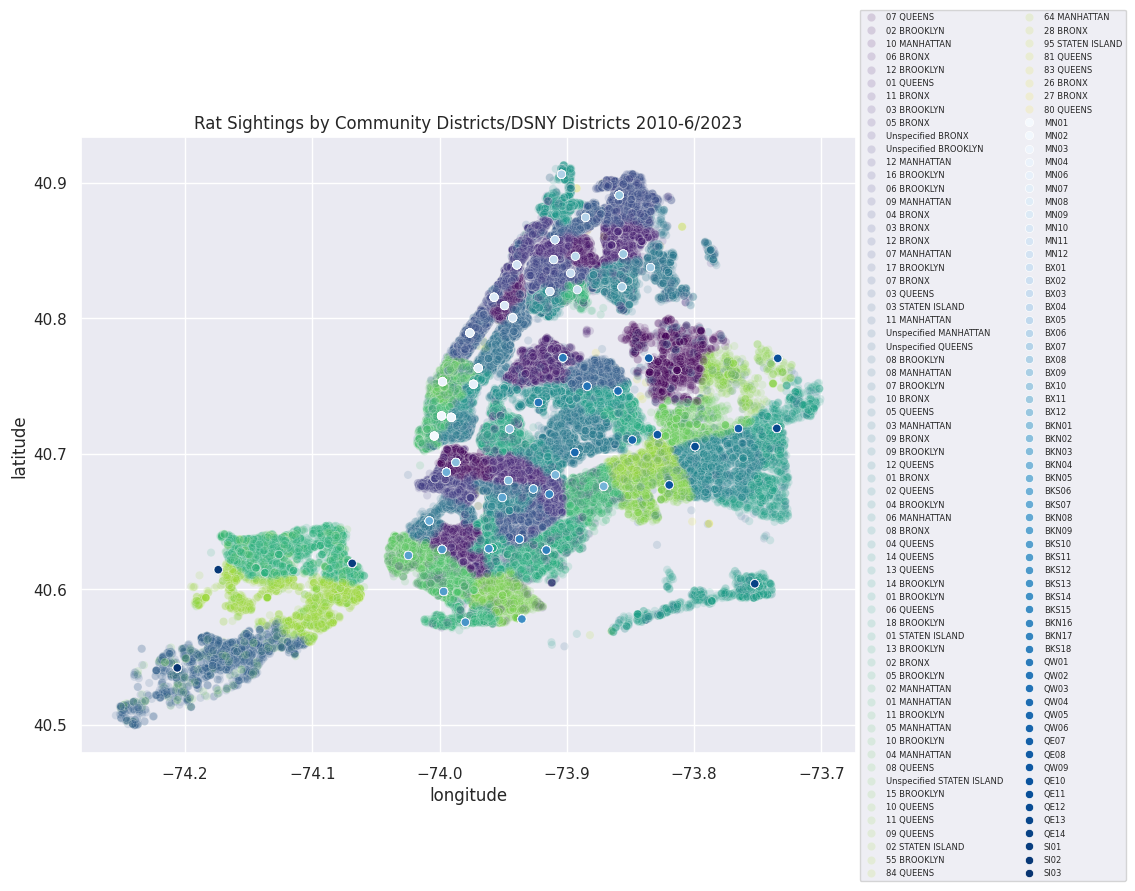

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=rat1, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", ax=ax)
sns.scatterplot(data=dsny1, x='Longitude', y='Latitude', hue= 'district', palette="Blues" , ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)
ax.set_title('Rat Sightings by Community Districts/DSNY Districts 2010-6/2023')
plt.show()

####Top ADDRESS_ZIP incidents =  rat1.groupby(['XXX'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

Top Incidents Broken down by Created Date, Year, Quarter,

In [68]:
# Top addresses ZIP codes by created date
top_addresses_by_created_date = rat1.groupby(['created_date'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by year
top_addresses_by_year = rat1.groupby(['year'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by quarter
top_addresses_by_quarter = rat1.groupby(['quarter'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by month
top_addresses_by_month = rat1.groupby(['month'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by weekday
top_addresses_by_weekday = rat1.groupby(['weekday'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by day of the week
top_addresses_by_day_of_week = rat1.groupby(['day'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by hour
top_addresses_by_hour = rat1.groupby(['hour'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Display the results
print("Top addresses ZIP code by created date:")
print(top_addresses_by_created_date)
print()

print("Top addresses ZIP code by year:")
print(top_addresses_by_year)
print()

print("Top addresses ZIP code by quarter:")
print(top_addresses_by_quarter)
print()

print("Top addresses ZIP code by month:")
print(top_addresses_by_month)
print()

print("Top addresses ZIP code by weekday:")
print(top_addresses_by_weekday)
print()

print("Top addresses ZIP code by day of the week:")
print(top_addresses_by_day_of_week)
print()

print("Top addresses ZIP code by hour:")
print(top_addresses_by_hour)
print()

Top addresses ZIP code by created date:
created_date                                       
2010-01-01 08:29:58  202 PULASKI STREET, 11206         1
2010-01-01 11:20:45  59-13 159 STREET, 11365           1
2010-01-01 12:11:51  317 WEST 120 STREET, 10027        1
2010-01-01 12:12:04  2356 LORILLARD PLACE, 10458       1
2010-01-01 14:15:27  900 CONEY ISLAND AVENUE, 11218    1
                                                      ..
2023-08-25 22:37:34  533 QUINCY STREET, 11221          1
2023-08-25 22:44:25  529A QUINCY STREET, 11221         1
2023-08-25 23:43:49  758 KELLY STREET, 10455           1
2023-08-25 23:46:07  1359 PROSPECT PLACE, 11213        1
2023-08-26 01:42:28  1985 CRESTON AVENUE, 10453        1
Name: address_zip, Length: 121460, dtype: int64

Top addresses ZIP code by year:
year                            
2010  600 WEST 196 STREET, 10040    28
      EAST 93 STREET, 10128         23
      2980 WEST 28 STREET, 11224    18
      2970 WEST 27 STREET, 11224    18
      673 D

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(0.0, 0, '(2010, 600 WEST 196 STREET, 10040)'),
  Text(10.0, 0, '(2012, 46-01 67 STREET, 11377)'),
  Text(20.0, 0, '(2014, 2131 WALLACE AVENUE, 10462)'),
  Text(30.0, 0, '(2016, 95 EASTERN PARKWAY, 11238)'),
  Text(40.0, 0, '(2018, 410 EASTERN PARKWAY, 11225)'),
  Text(50.0, 0, '(2020, 76 STREET NICHOLAS PLACE, 10032)'),
  Text(60.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(70.0, 0, ''),
  Text(80.0, 0, '')])

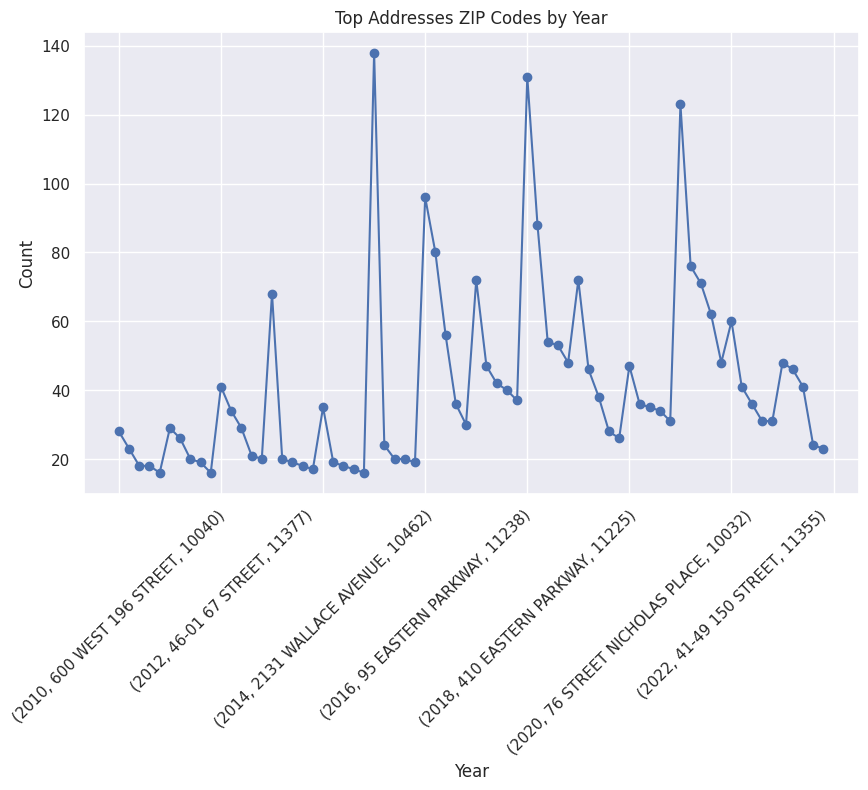

In [69]:
plt.figure(figsize=(10, 6))
top_addresses_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Addresses ZIP Codes by Year')
plt.xticks(rotation=45)

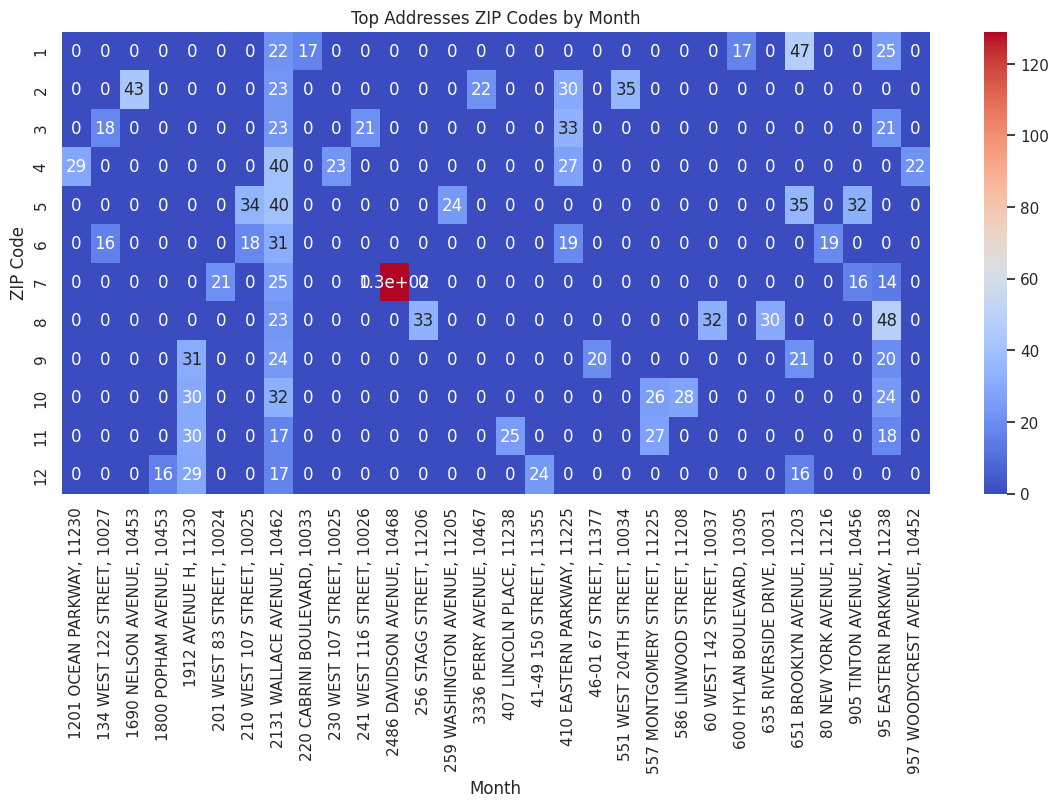

In [70]:
plt.figure(figsize=(14, 6))
sns.heatmap(top_addresses_by_month.unstack().fillna(0), cmap='coolwarm', annot=True)
plt.xlabel('Month')
plt.ylabel('ZIP Code')
plt.title('Top Addresses ZIP Codes by Month')
plt.xticks(rotation=90)
plt.show()

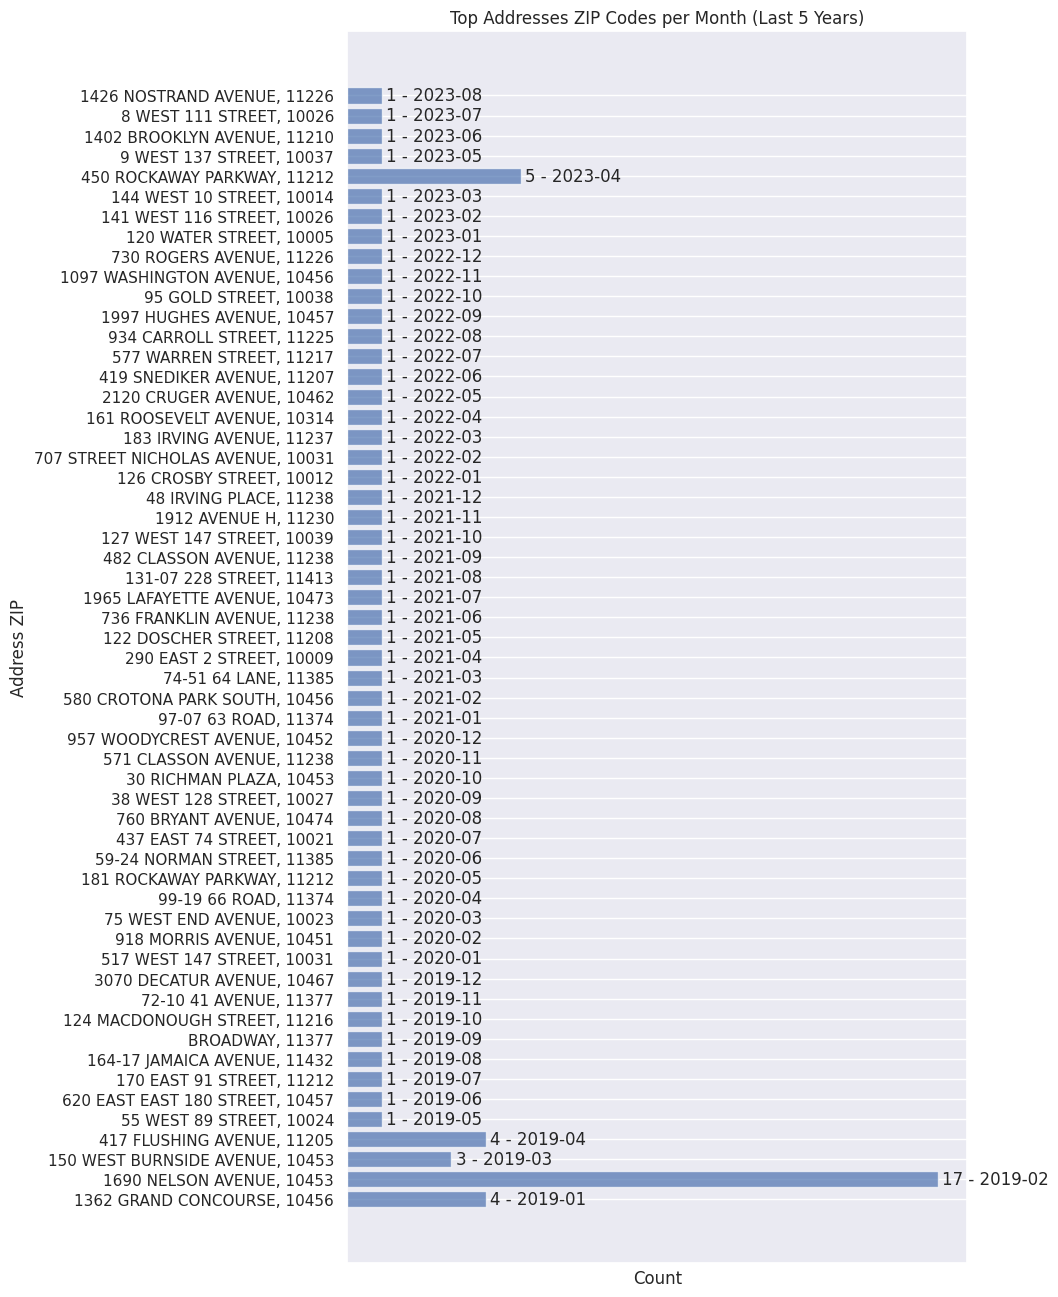

In [71]:
# Convert the series to a DataFrame
df_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
df_top_addresses.reset_index(inplace=True)

# Rename the columns
df_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
df_top_addresses['created_date'] = pd.to_datetime(df_top_addresses['created_date'])
df_top_addresses['month_year'] = df_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
df_top_addresses = df_top_addresses[df_top_addresses['created_date'].dt.year >= five_years_ago]

# Get the top 3 ZIP codes per month
top_3_per_month = df_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(8, 16))

# Plot the data
bars = ax.barh(top_3_per_month['address_zip'], top_3_per_month['count'], alpha=0.7)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Address ZIP')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years)')

# Add labels to the bars indicating the count and month-year
for bar, month_year in zip(bars, top_3_per_month['month_year'].astype(str)):
    width = bar.get_width()
    ax.annotate(f'{int(width)} - {month_year}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0),
                textcoords="offset points", ha='left', va='center')

# Remove x-axis ticks since count is already shown in the labels
ax.xaxis.set_ticks([])

# Display the plot
plt.show()

####Top Community Board = rat1.groupby(['XXX', 'community_board']).size().reset_index(name='cb_count')

#####Top Community board by created date

In [72]:
# Top  Community Boards by Created Date'
top_community_board_counts = rat1.groupby(['created_date', 'community_board']).size().reset_index(name='cb_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_community_board_sorted = top_community_board_counts.sort_values(by=['created_date', 'cb_count'], ascending=[False, False])

print("Top Addresses by Sightings Created Date:")
print(top_community_board_sorted)

Top Addresses by Sightings Created Date:
              created_date community_board  cb_count
172642 2023-08-26 01:42:28        05 BRONX         1
172641 2023-08-25 23:46:07     08 BROOKLYN         1
172640 2023-08-25 23:43:49        02 BRONX         1
172639 2023-08-25 22:44:25     03 BROOKLYN         1
172638 2023-08-25 22:37:34     03 BROOKLYN         1
...                    ...             ...       ...
4      2010-01-01 14:15:27     12 BROOKLYN         1
3      2010-01-01 12:12:04        06 BRONX         1
2      2010-01-01 12:11:51    10 MANHATTAN         1
1      2010-01-01 11:20:45       07 QUEENS         1
0      2010-01-01 08:29:58     03 BROOKLYN         1

[172643 rows x 3 columns]


In [73]:
# Filter the 'cd_count' values that are >= 5
top_cb_greaterthan5 = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

print("Top Addresses by Sightings Created Date (Counts >= 5):")
print(top_cb_greaterthan5)

Top Addresses by Sightings Created Date (Counts >= 5):
              created_date        community_board  cb_count
160712 2023-04-03 11:40:47            17 BROOKLYN         5
74621  2019-04-16 00:00:00            09 BROOKLYN         5
74627  2019-04-16 00:00:00      Unspecified BRONX         5
74542  2019-04-14 00:00:00   Unspecified BROOKLYN         9
74516  2019-04-13 00:00:00  Unspecified MANHATTAN         5
...                    ...                    ...       ...
4511   2010-07-08 00:00:00           08 MANHATTAN         8
4523   2010-07-08 00:00:00   Unspecified BROOKLYN         6
4494   2010-07-07 00:00:00   Unspecified BROOKLYN        11
4466   2010-07-06 00:00:00   Unspecified BROOKLYN         5
4405   2010-07-02 00:00:00      Unspecified BRONX         5

[2176 rows x 3 columns]


In [74]:
# Filter the data for cb_count >= 5
df_filtered_counts = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts = df_filtered_counts[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5):")
print(filtered_counts)

# Convert the 'created_date' column to a period type representing month and year
top_community_board_sorted['created_date'] = pd.to_datetime(top_community_board_sorted['created_date'])
top_community_board_sorted['month_year'] = top_community_board_sorted['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
top_community_board_sorted_filtered = top_community_board_sorted[top_community_board_sorted['created_date'].dt.year >= five_years_ago_cb]

# Filter the data for cb_count >= 5
df_filtered_counts_filtered = top_community_board_sorted_filtered[top_community_board_sorted_filtered['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts_filtered = df_filtered_counts_filtered[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):")
print(filtered_counts_filtered)

Top Community Boards by Sightings Created Date (Counts >= 5):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
...                       ...       ...
9977         03 STATEN ISLAND         6
8660              11 BROOKLYN         5
5625             08 MANHATTAN         7
5383                02 QUEENS         5
4511             08 MANHATTAN         8

[209 rows x 2 columns]
Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
74424    Unspecified BROOKLYN        11
74387    Unspecified BROOKLYN         6
74363             01 BROOKLYN         

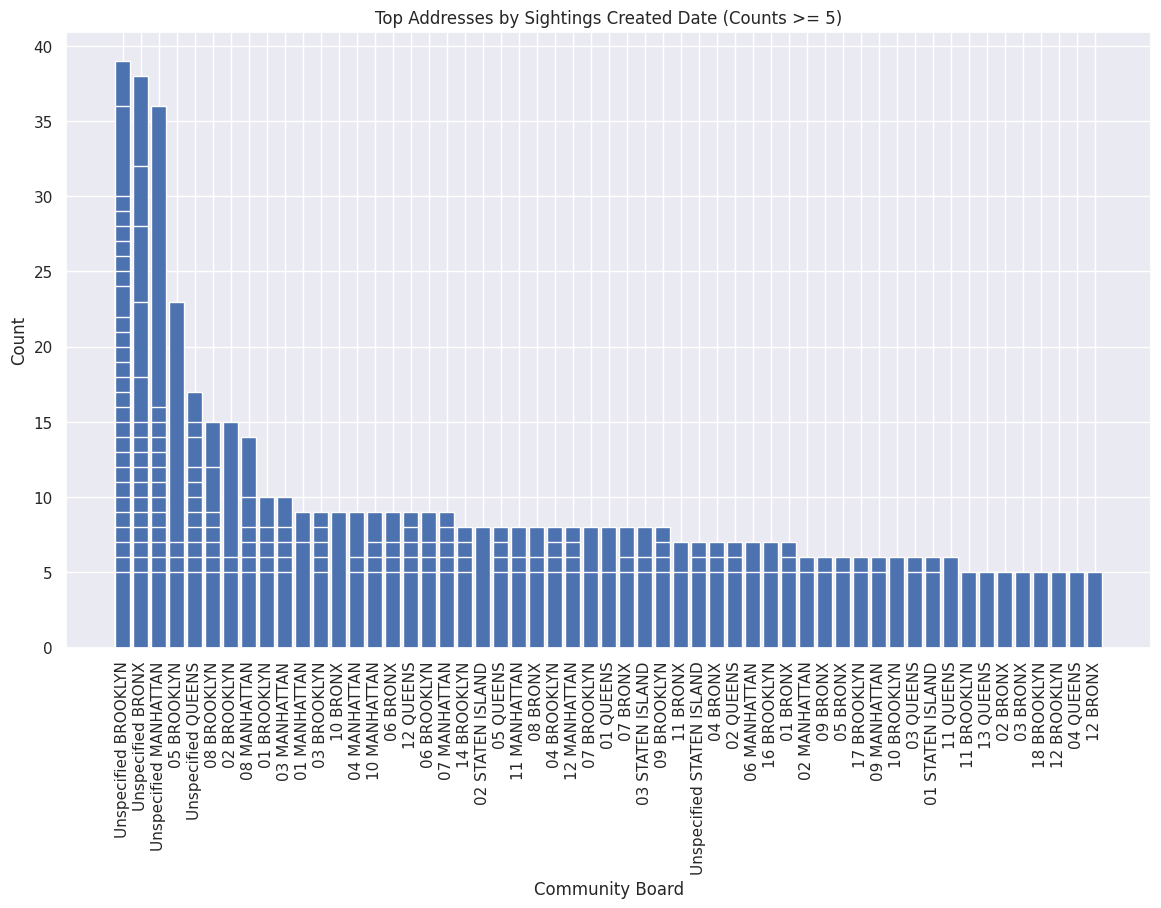

In [75]:
# Sort the data by 'cb_count' in descending order
filtered_counts_sorted = filtered_counts.sort_values('cb_count', ascending=False)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data as a bar chart
ax.bar(filtered_counts_sorted['community_board'], filtered_counts_sorted['cb_count'])

# Set the labels and title
ax.set_xlabel('Community Board')
ax.set_ylabel('Count')
ax.set_title('Top Addresses by Sightings Created Date (Counts >= 5)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

#####Top Community board YQMweekday

In [76]:

# # Top Community Boards by year','quarter','month','weekday'
# top_cb_yqmw = rat1.groupby(['year','quarter','month','weekday', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top Community Boards by year','quarter','month','weekday':")
# print(top_cb_yqmw)
# print()

#####Top Community board YQM

In [77]:

# # Top  Community Boards by year','quarter','month'
# top_cb_yqm = rat1.groupby(['year','quarter','month', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top  Community Boards by year...:")
# print(top_cb_yqm)
# print()

#####Top Community board YQ

In [78]:

# Top  Community Boards by year','quarter'
top_cb_yq_counts = rat1.groupby(['year','quarter', 'community_board']).size().reset_index(name='yq_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_yq_sorted = top_cb_yq_counts.sort_values(by=['year','quarter', 'yq_count'], ascending=[True,True, False])

print("Top  Community Boards by year and quarter:")
print(top_cb_yq_sorted)

Top  Community Boards by year and quarter:
      year  quarter     community_board  yq_count
29    2010        1        07 MANHATTAN        87
37    2010        1        09 MANHATTAN        71
11    2010        1         03 BROOKLYN        62
27    2010        1            07 BRONX        57
15    2010        1            04 BRONX        55
...    ...      ...                 ...       ...
3533  2023        3  Unspecified QUEENS         9
3527  2023        3        64 MANHATTAN         2
3529  2023        3           83 QUEENS         2
3530  2023        3   Unspecified BRONX         2
3528  2023        3           80 QUEENS         1

[3534 rows x 4 columns]


#####Top Community board Y

In [79]:

# Compute the count of sightings by 'year' and 'community_board'
top_cb_y_counts = rat1.groupby(['year', 'community_board']).size().reset_index(name='y_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_y_sorted = top_cb_y_counts.sort_values(by=['year', 'y_count'], ascending=[True, False])

print("Top incident address by year and community board:")
print(top_cb_y_sorted)

Top incident address by year and community board:
     year        community_board  y_count
60   2010   Unspecified BROOKLYN      567
29   2010           07 MANHATTAN      364
11   2010            03 BROOKLYN      335
61   2010  Unspecified MANHATTAN      326
59   2010      Unspecified BRONX      321
..    ...                    ...      ...
916  2023           64 MANHATTAN        3
919  2023              83 QUEENS        2
915  2023               26 BRONX        1
917  2023              80 QUEENS        1
918  2023              81 QUEENS        1

[924 rows x 3 columns]


####Top Incidents by  New Columns = CB_address_zip = community board + address + zip AND CB_counts = rat1.groupby(['created_date', 'CB_address_zip'])['unique_key'].transform('count')

#####Year, created date

In [80]:
# Create a new column combining 'community_board', 'incident_address', and 'incident_zip'
rat1['CB_address_zip'] = rat1['community_board'] + ', ' + rat1['incident_address'] + ', ' + rat1['incident_zips']

rat1['CB_counts'] = rat1.groupby(['created_date', 'CB_address_zip'])['unique_key'].transform('count')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
rat1_last5yrs = rat1[rat1['created_date'].dt.year >= five_years_ago_cb]

# Get the sum of the counts CB_address_zip column
last5yrs_filtered_counts = rat1_last5yrs.groupby('CB_address_zip').agg({'CB_counts': 'sum'}).reset_index()
top_5_address_counts = last5yrs_filtered_counts.nlargest(5, 'CB_counts')

print("Top Addresses by Sightings Created Date (Last 5 Years):")
print(top_5_address_counts)

Top Addresses by Sightings Created Date (Last 5 Years):
                                     CB_address_zip  CB_counts
53199  Unspecified BRONX, 1690 NELSON AVENUE, 10453      583.0
49513             14 BROOKLYN, 1912 AVENUE H, 11230      134.0
31887            07 QUEENS, 41-49 150 STREET, 11355      124.0
37621     09 BROOKLYN, 557 MONTGOMERY STREET, 11225      117.0
42772          11 BRONX, 2131 WALLACE AVENUE, 10462      113.0


#####year quarter

In [81]:

# Group the data by 'year', 'quarter', and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_yq_counts = rat1.groupby(['year', 'quarter', 'CB_address_zip']).size().reset_index(name='count_yq')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_yq_sorted = top_addresses_zip_yq_counts.sort_values(by=['year','quarter', 'count_yq'], ascending=[True,True, False])

# Display the count of sightings by 'year', 'created_date', and 'CB_address_zip' in descending order with sorted years
print("Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):")
print(top_addresses_zip_yq_sorted)

Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):
        year  quarter                              CB_address_zip  count_yq
1252    2010        1     13 BROOKLYN, 2980 WEST 28 STREET, 11224        14
1243    2010        1          12 QUEENS, 89-38 164 STREET, 11432         9
737     2010        1    07 MANHATTAN, 218 WEST 108 STREET, 10025         6
360     2010        1         04 BRONX, 1225 MORRIS AVENUE, 10456         5
44      2010        1      01 BROOKLYN, 726 BEDFORD AVENUE, 11206         4
...      ...      ...                                         ...       ...
170973  2023        3        Unspecified QUEENS, 65 STREET, 11377         1
170974  2023        3        Unspecified QUEENS, 70 AVENUE, 11367         1
170975  2023        3        Unspecified QUEENS, 88 STREET, 11414         1
170976  2023        3     Unspecified QUEENS, LOCKE AVENUE, 11357         1
170977  2023        3  Unspecified QUEENS, STEINWAY STREET, 1110

#####year

In [82]:
# Group the data by 'year' and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_y_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count_y')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_y_sorted = top_addresses_zip_y_counts.sort_values(by=['year', 'count_y'], ascending=[False, False])

# Select the top addresses with the highest counts for each year
top_2_addresses = top_addresses_zip_y_sorted.groupby('year').apply(lambda x: x.nlargest(2, 'count_y')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_2_addresses['label'] = top_2_addresses['CB_address_zip'] + ' (' + top_2_addresses['year'].astype(str) + ')'

the above looks correct...?

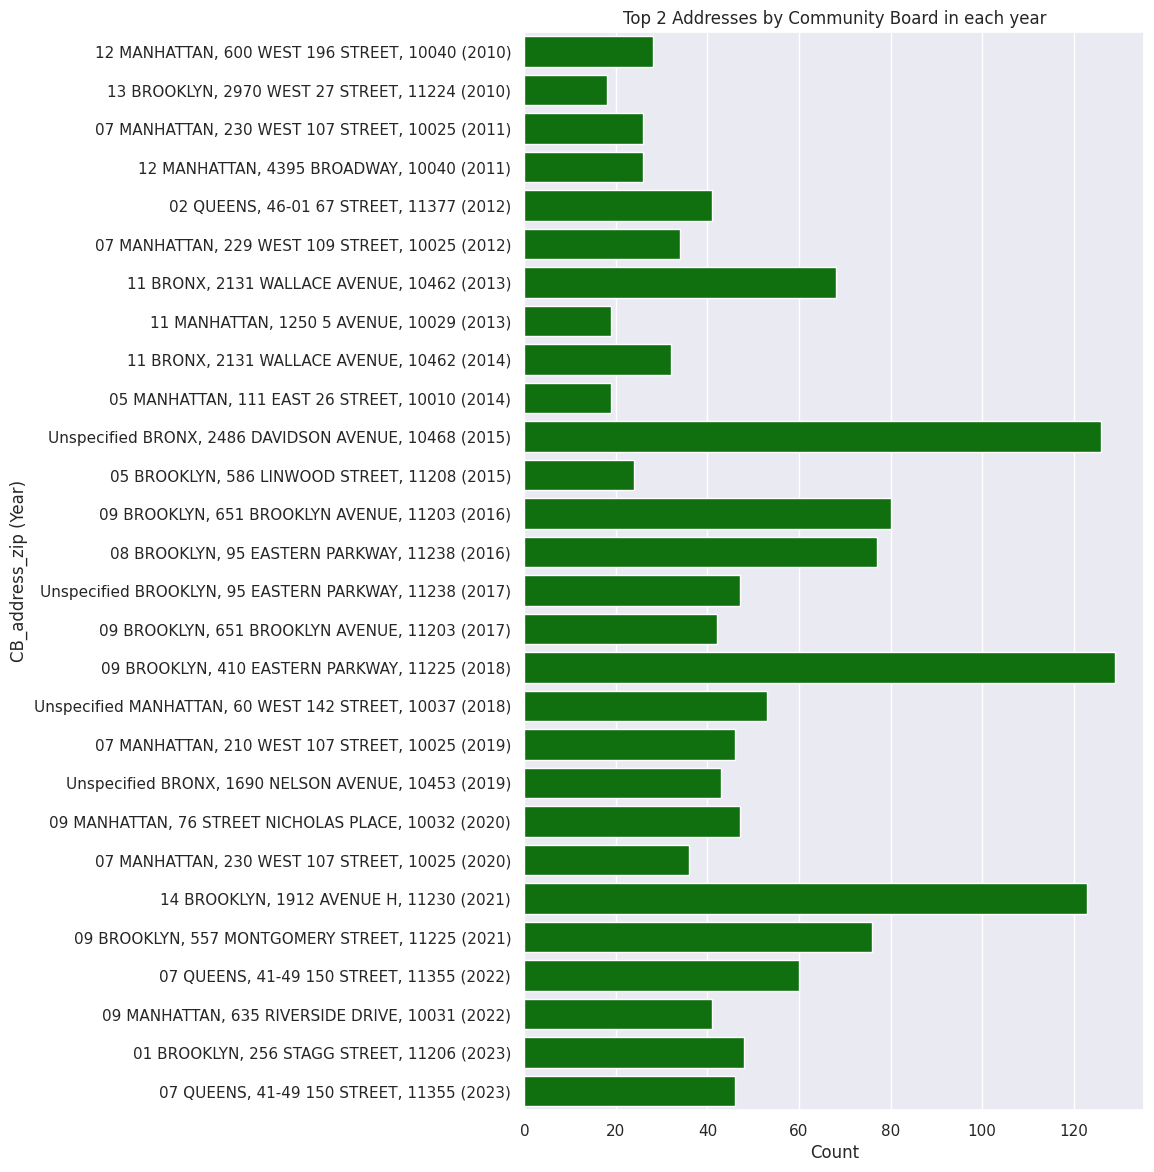

In [83]:
# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(8, 14))
sns.barplot(data=top_2_addresses, x='count_y', y='label', color='green')
plt.xlabel('Count')
plt.ylabel('CB_address_zip (Year)')
plt.title('Top 2 Addresses by Community Board in each year')
plt.xticks()
plt.show()

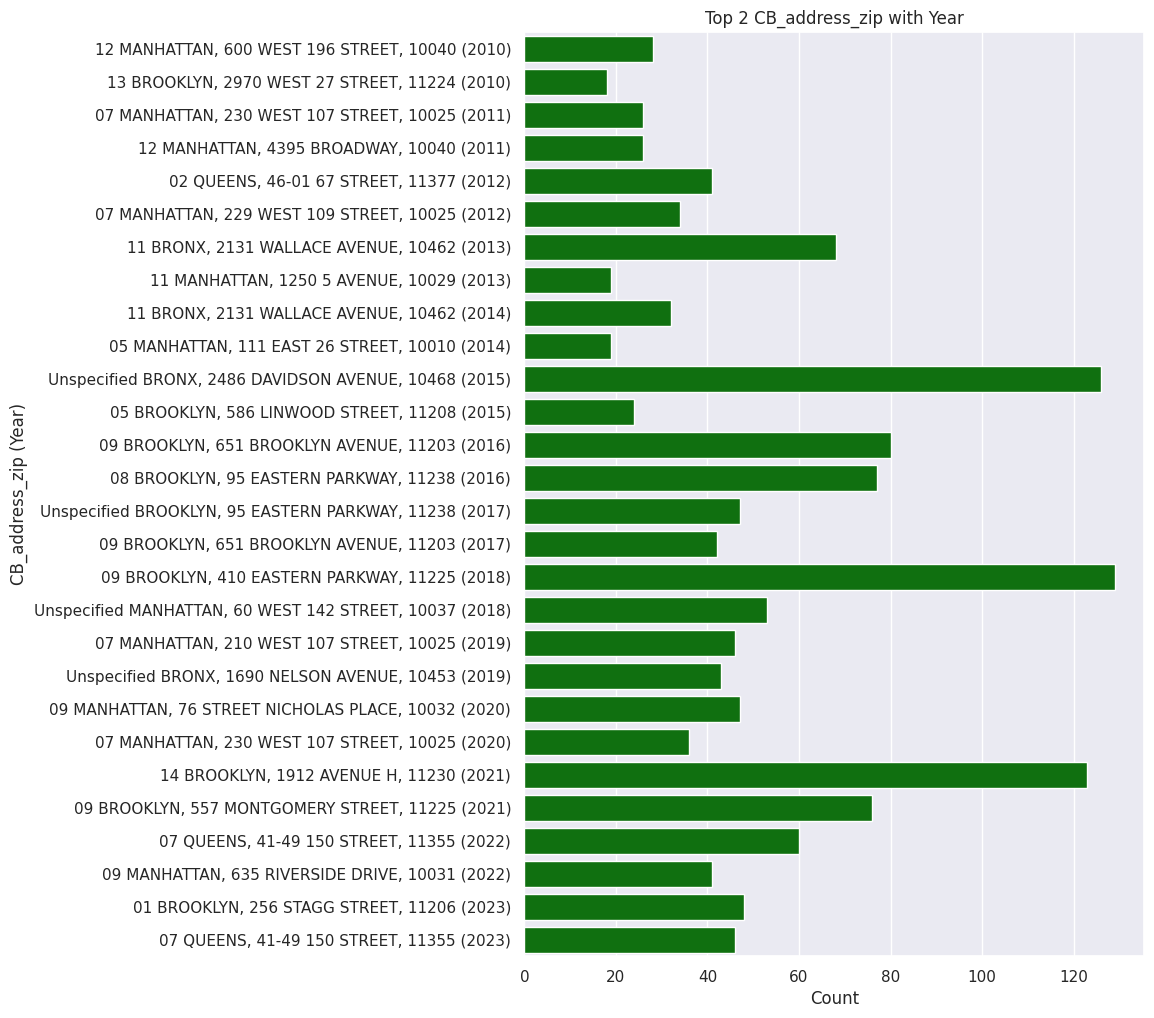

In [84]:
# Group the data by 'year' and 'CB_address_zip' and get the count
CB_year_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count')

# Select the top addresses with the highest counts
top_addresses = CB_year_counts.groupby('year').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_addresses['label'] = top_addresses['CB_address_zip'] + ' (' + top_addresses['year'].astype(str) + ')'

# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(8, 12))
sns.barplot(data=top_addresses, x='count', y='label', color='green')
plt.xlabel('Count')
plt.ylabel('CB_address_zip (Year)')
plt.title('Top 2 CB_address_zip with Year')
plt.xticks()
plt.show()

####Top unique addresses using only incident_address

In [85]:
top_10_unique_addresses = rat1['incident_address'].value_counts().nlargest(10).index.tolist()
print(top_10_unique_addresses)

['2131 WALLACE AVENUE', '95 EASTERN PARKWAY', '651 BROOKLYN AVENUE', '410 EASTERN PARKWAY', '2486 DAVIDSON AVENUE', '1912 AVENUE H', 'BROADWAY', '41-49 150 STREET', '557 MONTGOMERY STREET', '60 WEST 142 STREET']


#####Attempt this on the sets... or limit by year and community board?

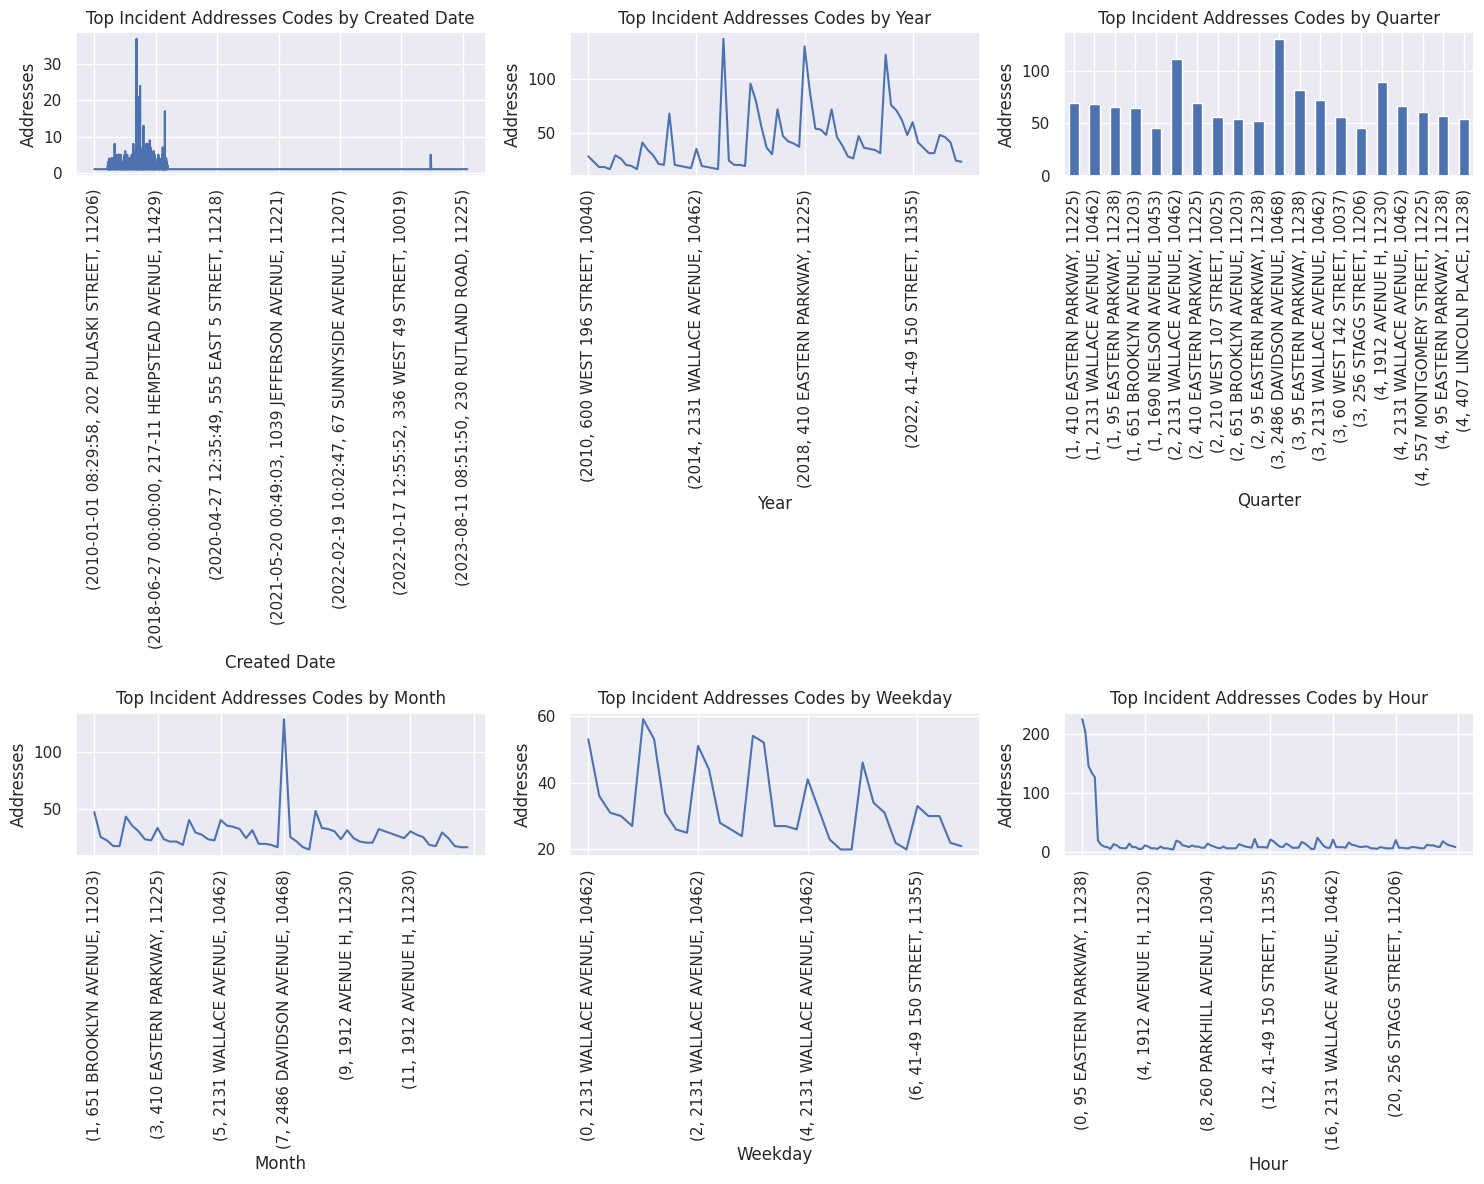

In [86]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Plot the top_addresses_by_created_date
plt.subplot(2, 3, 1)
top_addresses_by_created_date.plot(kind='line')
plt.xlabel('Created Date')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Created Date')
plt.xticks(rotation=90)
# Plot the top_addresses_by_year
plt.subplot(2, 3, 2)
top_addresses_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Year')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by quarter
plt.subplot(2, 3, 3)
top_addresses_by_quarter.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Quarter')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by month
plt.subplot(2, 3, 4)
top_addresses_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Month')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by weekday
plt.subplot(2, 3, 5)
top_addresses_by_weekday.plot(kind='line')
plt.xlabel('Weekday')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Weekday')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by hour
plt.subplot(2, 3, 6)
top_addresses_by_hour.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Hour')
plt.xticks(rotation=90)


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

 ##rat2 New DF ✅ I maybe over doing it but this is for my reference

In [87]:
# Define the number of largest values to consider
n_largest = 3

# Group the data by 'year' and 'location_type'
year_location_type_grouped_data = rat1.groupby(['year', 'location_type'])

# Sort the groups based on 'location_type' in descending order
year_location_type_grouped_data = sorted(year_location_type_grouped_data, key=lambda x: x[0][1], reverse=True)

# Define an empty dataframe to store the calculated results
calculated_data = pd.DataFrame(columns=['year', 'location_type', 'sum_sightings_count', 'average_sightings_per_capita',
                                        'average_duration', 'average_frequency_cb', 'create_dates_min', 'create_dates_max',
                                        'close_dates_min', 'close_dates_max'])

for year_location_type_group, group_data in year_location_type_grouped_data:
    # Calculate sum, average, and min-max for specific columns
    sum_sightings_count = group_data['sightings_count'].sum()
    average_sightings_per_capita = group_data['sightings_per_capita'].mean()
    average_duration = group_data['duration'].mean()
    average_frequency_cb = group_data['frequency_cb'].mean()
    create_dates_min = group_data['create_date'].min()
    create_dates_max = group_data['create_date'].max()
    close_dates_min = group_data['closed_date'].min()
    close_dates_max = group_data['closed_date'].max()

    # Create a new row with the calculated values
    new_row = {'year': year_location_type_group[0],
               'location_type': year_location_type_group[1],
               'sum_sightings_count': sum_sightings_count,
               'average_sightings_per_capita': average_sightings_per_capita,
               'average_duration': average_duration,
               'average_frequency_cb': average_frequency_cb,
               'create_dates_min': create_dates_min,
               'create_dates_max': create_dates_max,
               'close_dates_min': close_dates_min,
               'close_dates_max': close_dates_max}

    # Append the new row to the calculated_data dataframe
    calculated_data = calculated_data.append(new_row, ignore_index=True)

# Merge the calculated_data dataframe with the rat2 dataframe based on 'year' and 'location_type'
rat2 = pd.merge(rat2, calculated_data, on=['year', 'location_type'], how='left')


<ipython-input-87-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-87-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-87-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-87-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-87-b20f5d9e640b>:39: Futu

In [88]:
rat2

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,duration,frequency_cb,sum_sightings_count,average_sightings_per_capita,average_duration,average_frequency_cb,create_dates_min,create_dates_max,close_dates_min,close_dates_max
0,15633054,2010-01-01 11:20:45,1/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,0,1,2070,0.000020,7.430918,2.398551,2010-01-01,2010-12-31,2010-07-06 00:00:00,2011-09-15 00:00:00
1,15634275,2010-01-01 23:46:51,1/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,0,1,337,0.000024,11.759644,2.712166,2010-01-01,2010-12-31,2010-07-08 00:00:00,2011-05-09 00:00:00
2,15633896,2010-01-01 12:11:51,1/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,0,4,3621,0.000018,11.718862,6.564761,2010-01-01,2010-12-31,2010-07-01 00:00:00,2012-01-18 00:00:00
3,15633897,2010-01-01 12:12:04,1/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,0,4,3621,0.000018,11.718862,6.564761,2010-01-01,2010-12-31,2010-07-01 00:00:00,2012-01-18 00:00:00
4,15633828,2010-01-01 14:15:27,1/31/2010 2:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,0,2,204,0.000019,8.946078,3.210784,2010-01-01,2010-12-20,2010-07-02 00:00:00,2011-09-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215033,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,0,15,1605,0.000022,2.636760,8.254206,2022-01-02,2022-12-31,2022-01-02 14:13:36,2023-02-10 14:28:41
215034,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,0,5,11382,0.000018,2.220436,9.187928,2022-01-01,2022-12-31,2022-01-01 00:03:04,2023-03-16 16:38:53
215035,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,0,1,312,0.000019,2.137821,4.115385,2022-01-05,2022-12-31,2022-01-05 00:04:26,2023-02-10 14:32:47
215036,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,0,7,1605,0.000022,2.636760,8.254206,2022-01-02,2022-12-31,2022-01-02 14:13:36,2023-02-10 14:28:41


#rat2_analysis DF includes outliers

In [89]:
rat2_analysis = rat1.copy()

#Top value counts by address zip :  Rat2_analysis

In [90]:
top_counts = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

top_counts_df = top_counts.reset_index().sort_values(['sightings_per_capita', 'unique_key'], ascending=[False, False])

# Filter the DataFrame based on the 'unique_key' column
top_counts_df = top_counts_df[top_counts_df['unique_key'] == 16]

print(top_counts_df)

                      address_zip  unique_key  sightings_per_capita  \
66815   45 WEST 132 STREET, 10037          16              0.000047   
43806        2588 7 AVENUE, 10039          16              0.000036   
1171   101 WEST 143 STREET, 10030          16              0.000033   
5878   111 WEST 141 STREET, 10030          16              0.000033   
85338    72 CARMINE STREET, 10014          16              0.000033   
...                           ...         ...                   ...   
95963  95 LINDEN BOULEVARD, 11226          16              0.000010   
24425      17 DEVOE STREET, 11211          16              0.000010   
28775   188 SOUTH 3 STREET, 11211          16              0.000010   
85910   728 LORIMER STREET, 11211          16              0.000010   
57577  3530 DECATUR AVENUE, 10467          16              0.000010   

                 location_type  \
66815  3+ Family Apt. Building   
43806  3+ Family Apt. Building   
1171   3+ Family Apt. Building   
5878   3+ F

In [91]:
sightings_per_count = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
}).nlargest(100, 'unique_key', keep='first')

top_counts_df = top_counts.reset_index().sort_values('sightings_per_capita', ascending=False)
print(top_counts_df)

                          address_zip  unique_key  sightings_per_capita  \
48936          30 BROAD STREET, 10004           3               0.00033   
5187           11 STONE STREET, 10004           3               0.00033   
21991           16 WEST STREET, 10004           1               0.00033   
91423          85 PEARL STREET, 10004           1               0.00033   
87762          77 PEARL STREET, 10004           1               0.00033   
...                               ...         ...                   ...   
100093        WALLABOUT STREET, 11249           1                   NaN   
100358                 WEST DRIVE, 83           1                   NaN   
100385  WILLIAMBRG STREET EAST, 11249           1                   NaN   
100388     WILLIAMSBURG BRIDGE, 11249           1                   NaN   
100422            WYTHE AVENUE, 11249           3                   NaN   

                       location_type  \
48936          Other (Explain Below)   
5187             1-

In [92]:
count_16_df = top_counts_df[top_counts_df['unique_key'] == 16]
unique_address_zips = count_16_df['address_zip'].unique()
print(unique_address_zips)

['45 WEST 132 STREET, 10037' '2588 7 AVENUE, 10039'
 '101 WEST 143 STREET, 10030' '111 WEST 141 STREET, 10030'
 '72 CARMINE STREET, 10014' '202 EAST 21 STREET, 10010'
 '149 EAST 118 STREET, 10035' '2 EAST 125 STREET, 10035'
 '551 GRAHAM AVENUE, 11222' 'NASSAU AVENUE, 11222'
 '20-54 45 STREET, 11105' '386 EAST 139 STREET, 10454'
 '444 EAST 136 STREET, 10454' '321 WEST 116 STREET, 10026'
 '143 WEST 111 STREET, 10026' '86-34 WOODHAVEN BOULEVARD, 11421'
 '270 NAGLE AVENUE, 10034' '541 WEST 204TH STREET, 10034'
 '570 WEST 204 STREET, 10034' '145 WEST 55 STREET, 10019'
 '34 HILLSIDE AVENUE, 10040' '444 EAST 82 STREET, 10028'
 '222 EAST 81 STREET, 10028' '320 EAST 85 STREET, 10028'
 '1584 2 AVENUE, 10028' '941 INTERVALE AVENUE, 10459'
 '1070 INTERVALE AVENUE, 10459' '296 HARMAN STREET, 11237'
 '338 STARR STREET, 11237' '30 IRVING AVENUE, 11237'
 '127 LEFFERTS PLACE, 11238' '347 LINCOLN PLACE, 11238'
 '73 EASTERN PARKWAY, 11238' '487 CARLTON AVENUE, 11238'
 '251 CLIFTON PLACE, 11216' '792 STER

In [93]:
sightings_per_capita = rat2_analysis.groupby('address_zip').agg({
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

sightings_per_capita['unique_key_count'] = rat2_analysis.groupby('address_zip')['unique_key'].count()
sightings_per_capita_df = sightings_per_capita.reset_index().sort_values('sightings_per_capita', ascending=False)
print(sightings_per_capita_df)

                          address_zip  sightings_per_capita  \
48936          30 BROAD STREET, 10004               0.00033   
5187           11 STONE STREET, 10004               0.00033   
21991           16 WEST STREET, 10004               0.00033   
91423          85 PEARL STREET, 10004               0.00033   
87762          77 PEARL STREET, 10004               0.00033   
...                               ...                   ...   
100093        WALLABOUT STREET, 11249                   NaN   
100358                 WEST DRIVE, 83                   NaN   
100385  WILLIAMBRG STREET EAST, 11249                   NaN   
100388     WILLIAMSBURG BRIDGE, 11249                   NaN   
100422            WYTHE AVENUE, 11249                   NaN   

                       location_type  \
48936          Other (Explain Below)   
5187             1-2 Family Dwelling   
21991   3+ Family Mixed Use Building   
91423              Catch Basin/Sewer   
87762            Commercial Building   
...

In [94]:
sightings_per_capita_df.unique_key_count.unique()

array([  3,   1,   2,   4,   9,   6,   7,   5,  11,  15,  10,  21,   8,
        20,  35,  25,  12,  54,  19,  36,  14,  18,  16,  23,  33, 117,
        13,  24,  30,  39,  17,  26,  40,  32,  42,  34,  28,  37,  43,
        38,  31,  29,  22,  44,  61,  60,  41,  83,  85,  45,  27,  47,
        65,  63,  76,  51, 256,  68, 114,  59, 150,  50,  80,  73,  98,
       177, 317, 138,  49,  78, 124,  57,  53, 137,  64,  89, 112,  99,
        52,  86])

this needs fixed

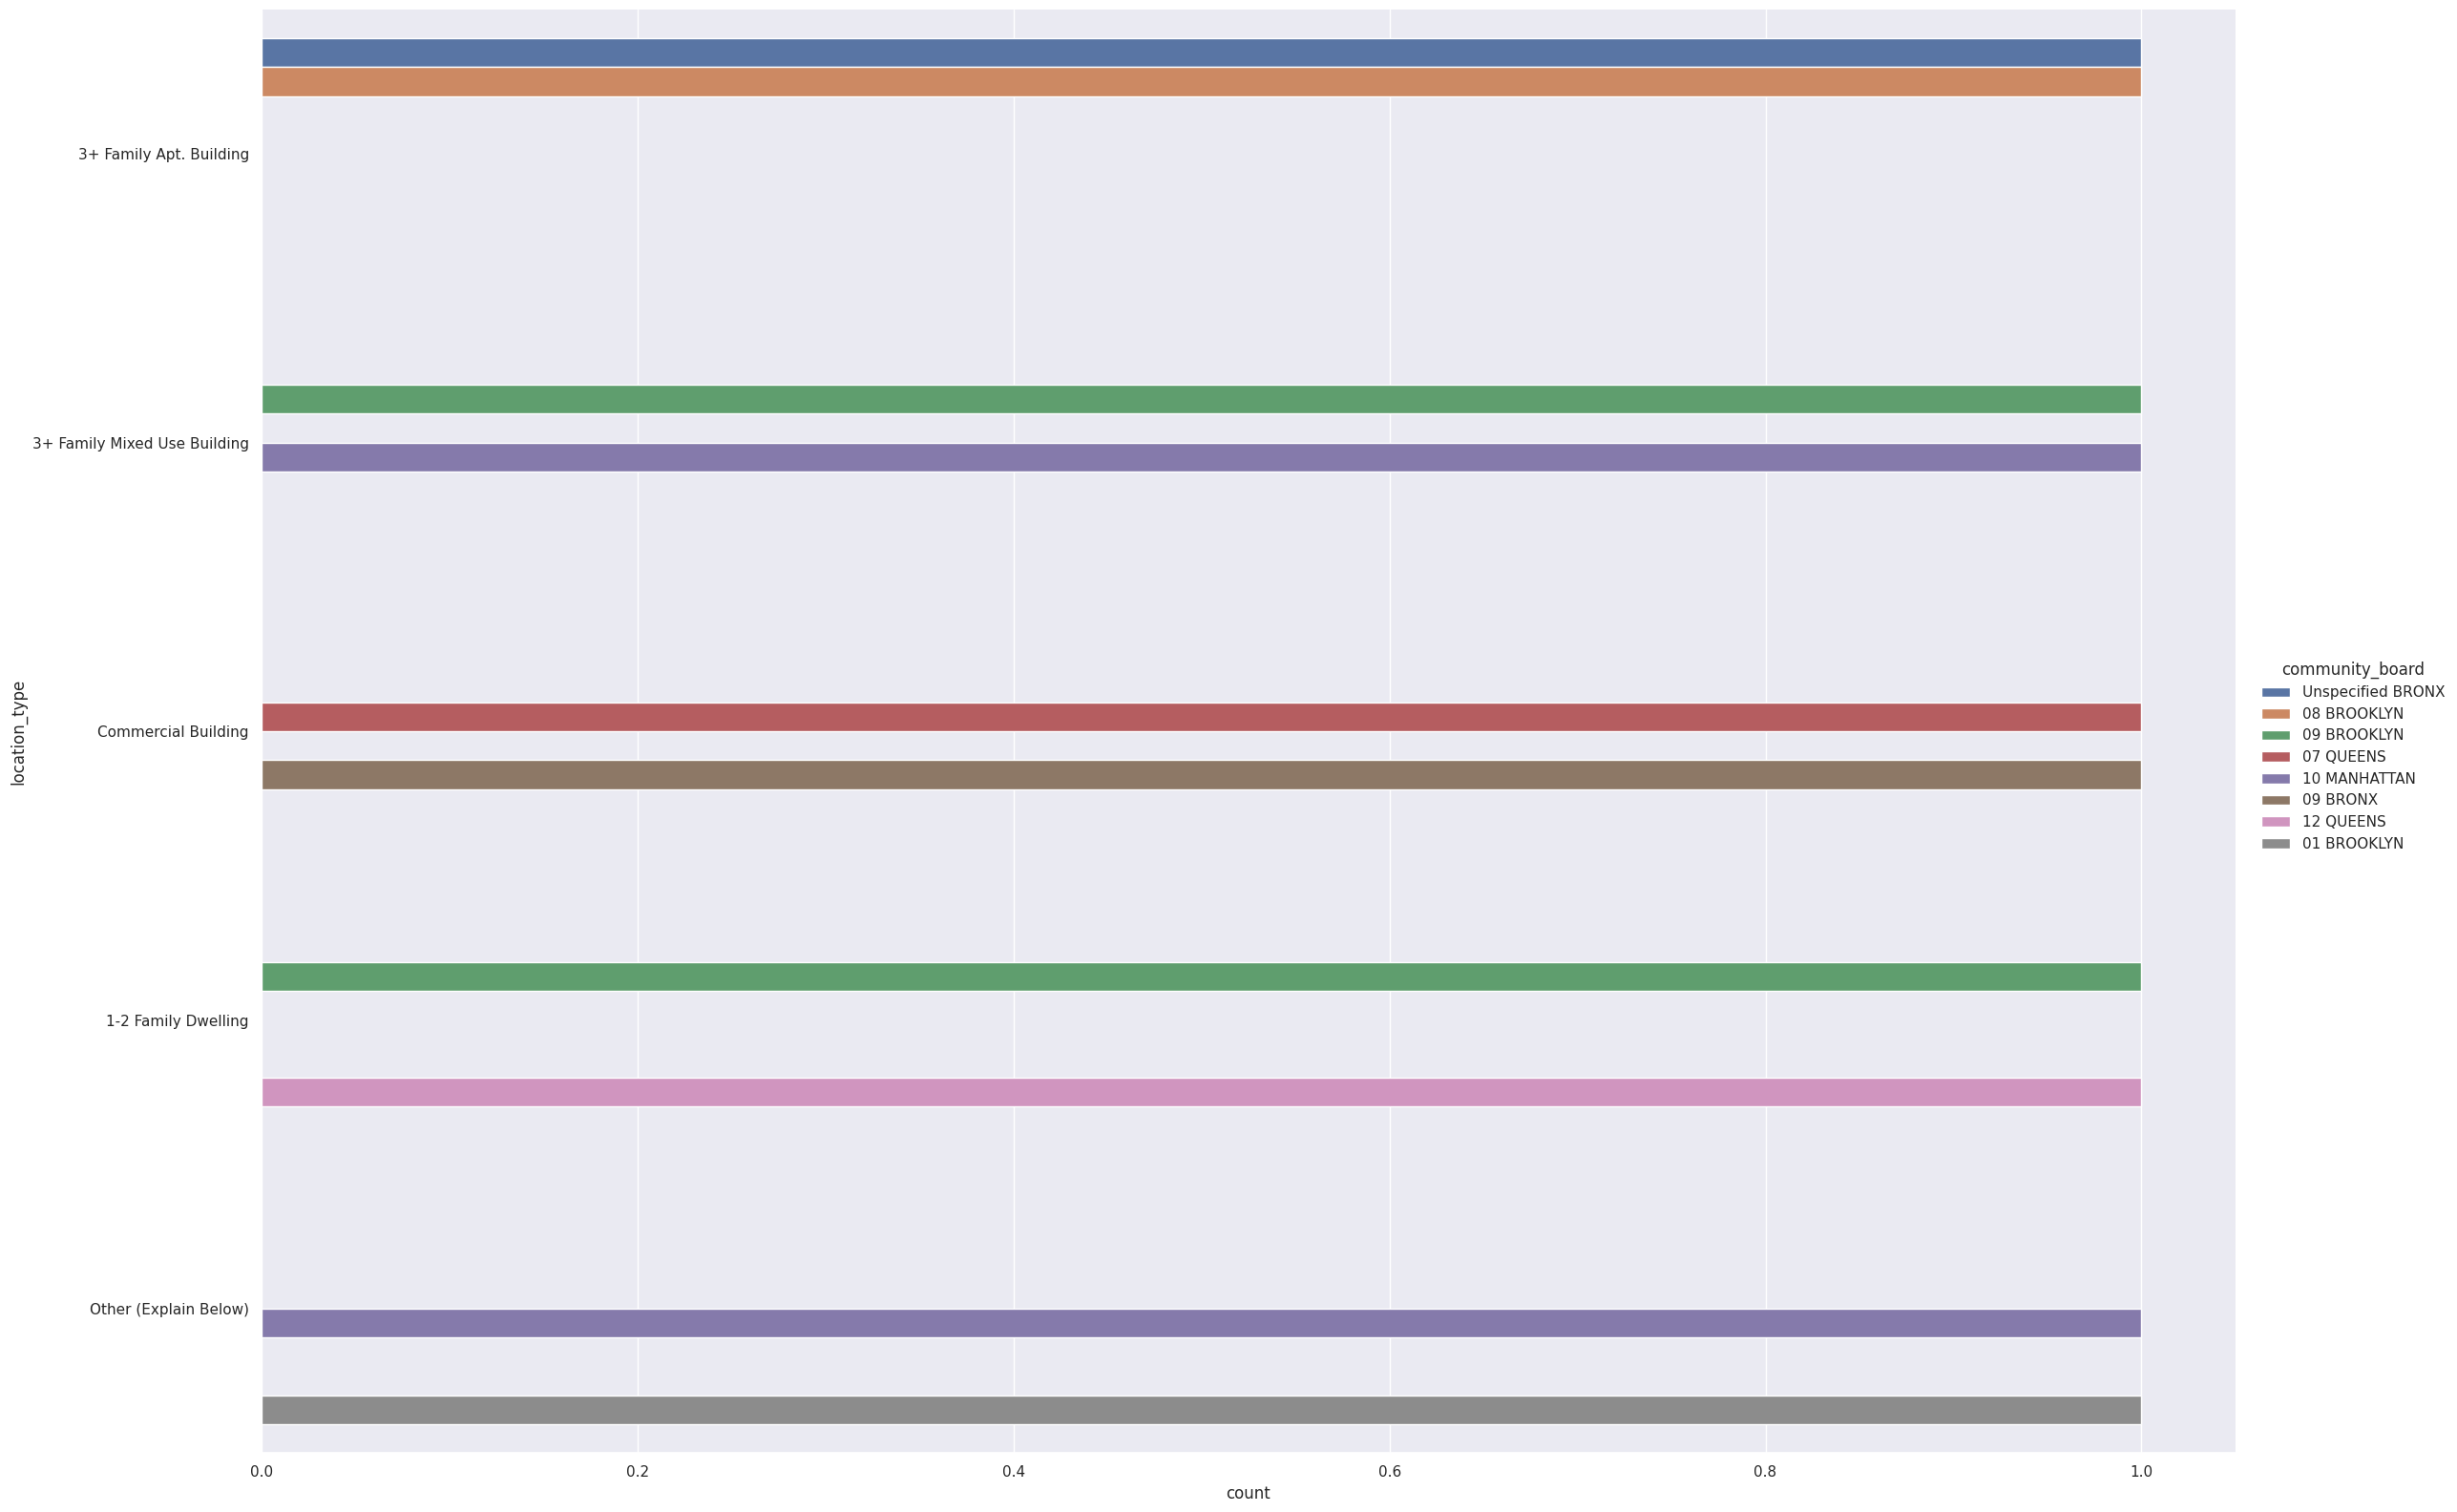

In [95]:
# Calculate the accumulated count per location type
accumulated_count = sightings_per_capita_df.groupby('location_type')['unique_key_count'].sum().reset_index()
top_5_location_types = accumulated_count.nlargest(5, 'unique_key_count')['location_type']

# Filter the data for the top 5 location types
top_5_per_category = (
    sightings_per_capita_df[sightings_per_capita_df['location_type'].isin(top_5_location_types)]
    .groupby('location_type')
    .apply(lambda x: x.nlargest(2, 'unique_key_count'))
    .reset_index(drop=True)
)

# Sort the location types in descending order based on the accumulated count
top_5_per_category = top_5_per_category.sort_values('unique_key_count', ascending=False)

# Plot the filtered data
sns.catplot(y='location_type', hue='community_board', data=top_5_per_category, kind='count', height=16, aspect=1.5)

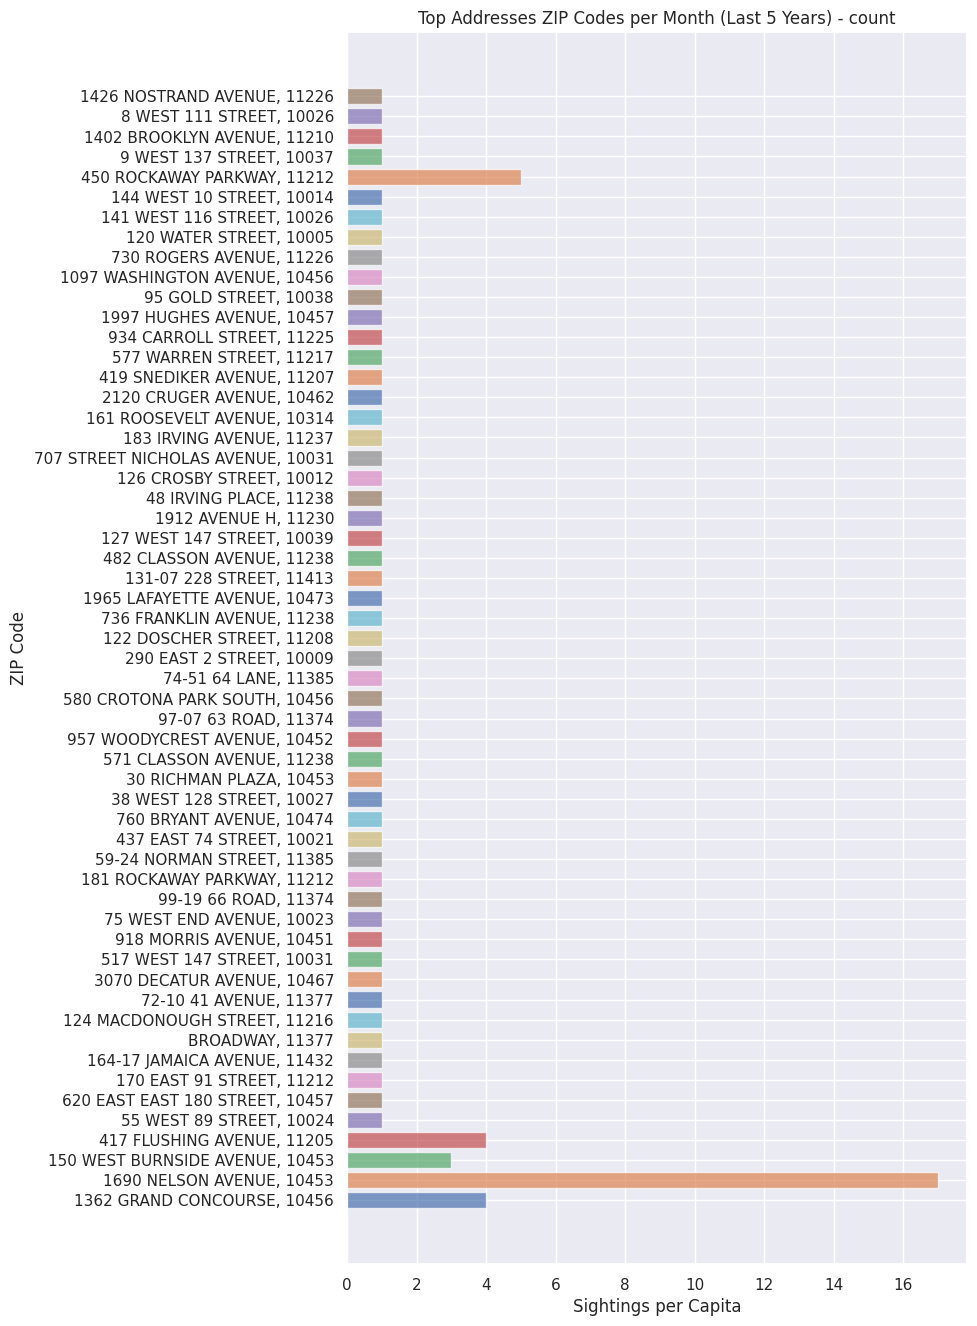

In [96]:
# Convert the series to a DataFrame
count_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
count_top_addresses.reset_index(inplace=True)

# Rename the columns
count_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
count_top_addresses['created_date'] = pd.to_datetime(count_top_addresses['created_date'])
count_top_addresses['month_year'] = count_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
count_top_addresses = count_top_addresses[count_top_addresses['created_date'].dt.year >= five_years_ago]

# Get the top 3 ZIP codes per month
top_3_per_month = count_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(8, 16))

# Plot the data
top_3_per_month.groupby('month_year').apply(lambda x: plt.barh(x['address_zip'], x['count'], alpha=0.7))

# Set the labels and title
ax.set_xlabel('Sightings per Capita')
ax.set_ylabel('ZIP Code')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years) - count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks()

# Display the plot
plt.show()

In [97]:
# sns.barplot(x='address_zip', y='sightings_per_capita', hue='community_board', data=top_100_address_counts_df)
# plt.xlabel('address_zip')
# plt.ylabel('sightings_per_capita')
# plt.title('Comparison of Counts')
# plt.xticks(rotation=90)
# plt.show()

#rat1_analysis: NEW df with no no nulls/ for value counts to scale and analyse/

In [98]:
# Create a new DataFrame for rat1 analysis
rat1_analysis = rat1.copy()

In [99]:
# Drop the specified columns
columns_to_drop = ['incident_address','incident_zip', 'incident_zips','cross_street _1', 'cross_street_2','closed_date','due_date', 'intersection_street_1', 'intersection_street_2', 'address_Type', 'landmark', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location','table_count', 'modztca', 'label', 'zcta', 'pop_est', 'create_date', 'close_date']
rat1_analysis = rat1_analysis.drop(columns_to_drop, axis=1).reset_index(drop=True)

In [100]:
rat1_analysis

,unique_key,created_date,location_type,borough,community_board,city,street_name,status,the_geom,address_zip,...,day,hour,sightings_count,Per Capita Sightings,Per Capita Sightings by Borough,sightings_per_capita,duration,frequency_cb,CB_address_zip,CB_counts
0,15633054,2010-01-01 11:20:45,1-2 Family Dwelling,QUEENS,07 QUEENS,FRESH MEADOWS,159 STREET,Pending,MULTIPOLYGON (((-73.81088698294997 40.72717335...,"59-13 159 STREET, 11365",...,1,11,1,0.000022,1.230238e-14,0.000022,0,1,"07 QUEENS, 59-13 159 STREET, 11365",1.0
1,15634275,2010-01-01 23:46:51,Commercial Building,BROOKLYN,02 BROOKLYN,BROOKLYN,FULTON STREET,Pending,MULTIPOLYGON (((-73.98999099359916 40.68331867...,"532 FULTON STREET, 11201",...,1,23,1,0.000016,2.852710e-15,0.000016,0,1,"02 BROOKLYN, 532 FULTON STREET, 11201",1.0
2,15633896,2010-01-01 12:11:51,3+ Family Apt. Building,MANHATTAN,10 MANHATTAN,NEW YORK CITY,WEST 120 STREET,Pending,MULTIPOLYGON (((-73.96581272236776 40.80884237...,"317 WEST 120 STREET, 10027",...,1,12,1,0.000015,5.181440e-15,0.000015,0,4,"10 MANHATTAN, 317 WEST 120 STREET, 10027",1.0
3,15633897,2010-01-01 12:12:04,3+ Family Apt. Building,BRONX,06 BRONX,BRONX,LORILLARD PLACE,Pending,MULTIPOLYGON (((-73.8999587931763 40.857423896...,"2356 LORILLARD PLACE, 10458",...,1,12,1,0.000012,4.213229e-15,0.000012,0,4,"06 BRONX, 2356 LORILLARD PLACE, 10458",1.0
4,15633828,2010-01-01 14:15:27,Vacant Building,BROOKLYN,12 BROOKLYN,BROOKLYN,CONEY ISLAND AVENUE,Pending,MULTIPOLYGON (((-73.97716602560648 40.63074880...,"900 CONEY ISLAND AVENUE, 11218",...,1,14,1,0.000013,2.405323e-15,0.000013,0,2,"12 BROOKLYN, 900 CONEY ISLAND AVENUE, 11218",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215033,55348031,2022-09-09 21:38:01,Commercial Building,MANHATTAN,02 MANHATTAN,NEW YORK CITY,MACDOUGAL STREET,Closed,MULTIPOLYGON (((-74.00408405811187 40.72537431...,"54 MACDOUGAL STREET, 10012",...,9,21,1,0.000043,1.428609e-14,0.000043,0,15,"02 MANHATTAN, 54 MACDOUGAL STREET, 10012",1.0
215034,55351913,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10 MANHATTAN,NEW YORK CITY,MANHATTAN AVENUE,Closed,MULTIPOLYGON (((-73.96200720826798 40.80550908...,"312 MANHATTAN AVENUE, 10026",...,9,21,1,0.000025,8.496598e-15,0.000025,0,5,"10 MANHATTAN, 312 MANHATTAN AVENUE, 10026",1.0
215035,55348032,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,04 MANHATTAN,NEW YORK CITY,TENTH AVENUE,Closed,MULTIPOLYGON (((-74.00114791977168 40.76202777...,"725 TENTH AVENUE, 10019",...,9,9,1,0.000023,7.652829e-15,0.000023,0,1,"04 MANHATTAN, 725 TENTH AVENUE, 10019",1.0
215036,55346704,2022-09-09 09:50:04,Commercial Building,MANHATTAN,03 MANHATTAN,NEW YORK CITY,EAST 7 STREET,Closed,MULTIPOLYGON (((-73.98863576728334 40.72293099...,"93 1/2 EAST 7 STREET, 10009",...,9,9,1,0.000017,5.773873e-15,0.000017,0,7,"03 MANHATTAN, 93 1/2 EAST 7 STREET, 10009",1.0


##rat1_analysis DF without outliers  for ml

In [101]:
Q1 = rat1_analysis['frequency_cb'].quantile(0.25)
Q3 = rat1_analysis['frequency_cb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rat1_analysis[(rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound)]

In [102]:
rat1_analysis = rat1_analysis[~((rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound))]

In [103]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192870 entries, 0 to 215037
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   unique_key                       192870 non-null  int64         
 1   created_date                     192870 non-null  datetime64[ns]
 2   location_type                    192860 non-null  object        
 3   borough                          192868 non-null  object        
 4   community_board                  192868 non-null  object        
 5   city                             190106 non-null  object        
 6   street_name                      192869 non-null  object        
 7   status                           192870 non-null  object        
 8   the_geom                         191823 non-null  object        
 9   address_zip                      192870 non-null  object        
 10  year                             192870 non-

In [104]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [105]:
missing_counts =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [106]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

 Missing values: 
                                 Counts         %
city                               2764  1.433090
Per Capita Sightings by Borough    1049  0.543890
the_geom                           1047  0.542853
sightings_per_capita               1047  0.542853
Per Capita Sightings               1047  0.542853
location_type                        10  0.005185
CB_counts                             2  0.001037
borough                               2  0.001037
community_board                       2  0.001037
CB_address_zip                        2  0.001037
street_name                           1  0.000518
hour                                  0  0.000000
frequency_cb                          0  0.000000
duration                              0  0.000000
sightings_count                       0  0.000000
unique_key                            0  0.000000
day                                   0  0.000000
weekday                               0  0.000000
created_date                    

In [107]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'location_type', 'borough',
       'community_board', 'city', 'street_name', 'status', 'the_geom',
       'address_zip', 'year', 'quarter', 'month', 'weekday', 'day', 'hour',
       'sightings_count', 'Per Capita Sightings',
       'Per Capita Sightings by Borough', 'sightings_per_capita', 'duration',
       'frequency_cb', 'CB_address_zip', 'CB_counts'],
      dtype='object')

In [108]:
# Reset the index and sort by 'unique_key' and 'created_date' in ascending order
rat1_analysis_sorted = rat1_analysis.sort_values(by=['created_date','unique_key'], ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(rat1_analysis_sorted)

        unique_key        created_date            location_type    borough  \
0         15633803 2010-01-01 08:29:58  3+ Family Apt. Building   BROOKLYN   
1         15633054 2010-01-01 11:20:45      1-2 Family Dwelling     QUEENS   
2         15633896 2010-01-01 12:11:51  3+ Family Apt. Building  MANHATTAN   
3         15633897 2010-01-01 12:12:04  3+ Family Apt. Building      BRONX   
4         15633828 2010-01-01 14:15:27          Vacant Building   BROOKLYN   
...            ...                 ...                      ...        ...   
192865    58617665 2023-08-25 22:19:52  3+ Family Apt. Building      BRONX   
192866    58622464 2023-08-25 22:37:34      1-2 Family Dwelling   BROOKLYN   
192867    58616460 2023-08-25 22:44:25  3+ Family Apt. Building   BROOKLYN   
192868    58620053 2023-08-25 23:46:07      1-2 Family Dwelling   BROOKLYN   
192869    58617666 2023-08-26 01:42:28  3+ Family Apt. Building      BRONX   

       community_board           city          street_name     

In [109]:
rat1_analysis = rat1_analysis_sorted.reset_index(drop=True)

In [110]:
missing_counts_ck =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent_ck = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [111]:
missing_rat = pd.concat([missing_counts_ck, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat}')

 Missing values: 
                                 Counts         %
city                               2764  1.433090
Per Capita Sightings by Borough    1049  0.543890
the_geom                           1047  0.542853
sightings_per_capita               1047  0.542853
Per Capita Sightings               1047  0.542853
location_type                        10  0.005185
CB_counts                             2  0.001037
borough                               2  0.001037
community_board                       2  0.001037
CB_address_zip                        2  0.001037
street_name                           1  0.000518
hour                                  0  0.000000
frequency_cb                          0  0.000000
duration                              0  0.000000
sightings_count                       0  0.000000
unique_key                            0  0.000000
day                                   0  0.000000
weekday                               0  0.000000
created_date                    

In [112]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192870 entries, 0 to 192869
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   unique_key                       192870 non-null  int64         
 1   created_date                     192870 non-null  datetime64[ns]
 2   location_type                    192860 non-null  object        
 3   borough                          192868 non-null  object        
 4   community_board                  192868 non-null  object        
 5   city                             190106 non-null  object        
 6   street_name                      192869 non-null  object        
 7   status                           192870 non-null  object        
 8   the_geom                         191823 non-null  object        
 9   address_zip                      192870 non-null  object        
 10  year                             192870 non-

In [113]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [114]:
rat1_analysis['city'] = rat1_analysis['city'].fillna('UNSPECIFIED')

In [115]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'location_type', 'borough',
       'community_board', 'city', 'street_name', 'status', 'the_geom',
       'address_zip', 'year', 'quarter', 'month', 'weekday', 'day', 'hour',
       'sightings_count', 'Per Capita Sightings',
       'Per Capita Sightings by Borough', 'sightings_per_capita', 'duration',
       'frequency_cb', 'CB_address_zip', 'CB_counts'],
      dtype='object')

In [116]:
# Group the 'rat1' dataframe by 'address_zip' and count the occurrences
top_address_counts = rat1.groupby('address_zip').size().reset_index(name='counts')

# Sort the dataframe by 'counts' in descending order
top_address_counts = top_address_counts.sort_values('counts', ascending=False)

# Join the 'rat1' dataframe with the 'top_address_counts' dataframe
top_address_counts = top_address_counts.merge(rat1, on='address_zip')

# Reset the index of the dataframe
top_address_counts = top_address_counts.reset_index(drop=True)

# Print the 'top_address_counts' dataframe
print(top_address_counts)


                            address_zip  counts  unique_key  \
0            2131 WALLACE AVENUE, 10462     317    27129307   
1            2131 WALLACE AVENUE, 10462     317    32399557   
2            2131 WALLACE AVENUE, 10462     317    24776738   
3            2131 WALLACE AVENUE, 10462     317    49551285   
4            2131 WALLACE AVENUE, 10462     317    29725825   
...                                 ...     ...         ...   
215033           24 STARR STREET, 11221       1    56276936   
215034  24 SOUTH PORTLAND AVENUE, 11217       1    30077572   
215035          24 SNYDER AVENUE, 11226       1    50258878   
215036           24 SKINNER LANE, 10310       1    36708417   
215037    ZOO CENTER TRAIL SOUTH, 10460       1    33703539   

              created_date               due_date         closed_date  \
0      2014-01-12 00:00:00   2/11/2014 1:08:47 PM 2014-01-27 00:00:00   
1      2016-01-12 00:00:00   2/11/2016 1:24:25 PM 2016-01-12 00:00:00   
2      2013-01-13 00:00:

In [117]:
# Filter the data for the last 3 years
current_year = pd.to_datetime('today').year
three_years_ago = current_year - 3
filtered_data = top_address_counts[top_address_counts['created_date'].dt.year >= three_years_ago]

# Get the top 10 unique addresses
top_10_addresses = filtered_data['address_zip'].unique()[:10]

# Filter the dataframe for the top 10 addresses
top_10_data = filtered_data[filtered_data['address_zip'].isin(top_10_addresses)]

# Print the top 10 unique addresses for the last 3 years
print(top_10_data['address_zip'].unique())

['2131 WALLACE AVENUE, 10462' '95 EASTERN PARKWAY, 11238'
 '651 BROOKLYN AVENUE, 11203' '1912 AVENUE H, 11230'
 '41-49 150 STREET, 11355' '60 WEST 142 STREET, 10037'
 '557 MONTGOMERY STREET, 11225' '120 WEST 94 STREET, 10025'
 '28 MARKET STREET, 10002' '210 WEST 107 STREET, 10025']


###StandardScalor

need to grab the dsny1 info and also drop columns befor scaling...normalization

In [118]:
top_address_scale = filtered_data.copy()

# # Select numeric columns for scaling
# numeric_columns = top_address_scale.select_dtypes(include=['int', 'float']).columns

# # Scale the numeric columns
# scaler = StandardScaler()
# top_address_scale[numeric_columns] = scaler.fit_transform(top_address_scale[numeric_columns])

# print(top_address_scale)

In [119]:
# top_address_scale

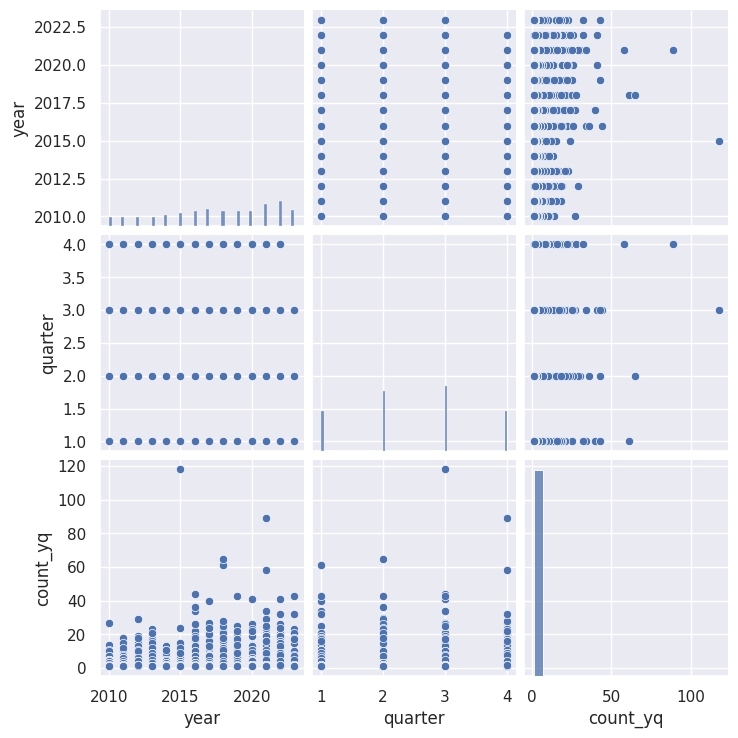

In [120]:
sns.pairplot(top_addresses_zip_yq_counts)

In [121]:
# # Calculate the correlation matrix
# correlation_matrix = top_address_scale.corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})
# plt.title('Correlation Matrix')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

###MinMaxScaler

In [122]:
# top_address_scale2 = top_address_counts.copy()
# top_address_scale2 = top_address_scale2.fillna(top_address_scale2.mean())

# # Define data
# data = top_address_scale2

# # Define min-max scaler
# scaler2 = MinMaxScaler()

# # Transform data
# scaled_top_address2 = scaler2.fit_transform(data)

# print(scaled_top_address2)

In [123]:
# Compute the correlation matrix
# minmax_correlation_matrix = np.corrcoef(scaled_top_address2, rowvar=False)

# print(minmax_correlation_matrix)

In [124]:
# plt.figure(figsize=(14, 6))
# sns.heatmap(minmax_correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})

# plt.title('Min Max - Correlation Matrix')
# plt.xticks(rotation=45)
# plt.show()

#rodents-dsny

In [125]:
rodents = top_address_counts.copy()

In [126]:
rodents.columns

Index(['address_zip', 'counts', 'unique_key', 'created_date', 'due_date',
       'closed_date', 'location_type', 'borough', 'incident_zip',
       'community_board', 'city', 'incident_address', 'street_name',
       'cross_street _1', 'cross_street_2', 'intersection_street_1',
       'intersection_street_2', 'address_Type', 'landmark', 'status',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'latitude',
       'longitude', 'location', 'table_count', 'modztca', 'label', 'zcta',
       'pop_est', 'the_geom', 'incident_zips', 'year', 'quarter', 'month',
       'weekday', 'day', 'hour', 'sightings_count', 'Per Capita Sightings',
       'Per Capita Sightings by Borough', 'sightings_per_capita',
       'create_date', 'close_date', 'duration', 'frequency_cb',
       'CB_address_zip', 'CB_counts'],
      dtype='object')

In [127]:
# List of redundant and unwanted columns
redundant_columns = [ 'counts', 'incident_zips', 'year', 'quarter', 'month','table_count',
        'day', 'hour', 'sightings_count', 'CB_counts', 'create_date', 'close_date']

# Remove redundant and unwanted columns
rodents = rodents.drop(columns=redundant_columns)

# Print the updated dataframe
print(rodents)

                            address_zip  unique_key        created_date  \
0            2131 WALLACE AVENUE, 10462    27129307 2014-01-12 00:00:00   
1            2131 WALLACE AVENUE, 10462    32399557 2016-01-12 00:00:00   
2            2131 WALLACE AVENUE, 10462    24776738 2013-01-13 00:00:00   
3            2131 WALLACE AVENUE, 10462    49551285 2021-01-13 11:01:52   
4            2131 WALLACE AVENUE, 10462    29725825 2015-01-15 00:00:00   
...                                 ...         ...                 ...   
215033           24 STARR STREET, 11221    56276936 2022-12-16 22:22:55   
215034  24 SOUTH PORTLAND AVENUE, 11217    30077572 2015-03-03 00:00:00   
215035          24 SNYDER AVENUE, 11226    50258878 2021-04-12 17:37:33   
215036           24 SKINNER LANE, 10310    36708417 2017-07-15 00:00:00   
215037    ZOO CENTER TRAIL SOUTH, 10460    33703539 2016-06-27 00:00:00   

                     due_date         closed_date  \
0        2/11/2014 1:08:47 PM 2014-01-27 00:00

In [128]:
rodents.isnull().sum()

address_zip                             0
unique_key                              0
created_date                            0
due_date                            93913
closed_date                         16711
location_type                          12
borough                                 2
incident_zip                            0
community_board                         2
city                                 3157
incident_address                        0
street_name                             1
cross_street _1                     18593
cross_street_2                      18587
intersection_street_1              117887
intersection_street_2              117848
address_Type                         4444
landmark                           127288
status                                  0
X Coordinate (State Plane)           1595
Y Coordinate (State Plane)           1595
latitude                             1595
longitude                            1595
location                          

In [129]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID', 'location'],
      dtype='object')

In [ ]:
# Create a binary column in both dataframes
rodents['merge_column'] = 1
dsny1['merge_column'] = 1

rodent_analysis = rodents[['merge_column','modztca','created_date','address_zip',
                           'community_board', 'city','location_type','status',
                           'sightings_per_capita','duration', 'frequency_cb',
                           'CB_address_zip', 'pop_est']]

# Select relevant columns from the 'dsny1' dataframe
dsny_analysis = dsny1[['merge_column','modzcta', 'district',
                       'schedulecode', 'bulk_frequency','bulk_day1', 'bulk_day2',
                       'bulk_day3', 'refuse_frequency','refuse_day1', 'refuse_day2',
                       'refuse_day3', 'recycling_frequency','organic_frequency']]

rodent_analysis.reset_index(drop=True, inplace=True)
dsny_analysis.reset_index(drop=True, inplace=True)
#NEEDS TO BE SIMPLIFIED? AGGREGATED? WHAT TO DO?
# used  top_10_data for the rats_dsny_T10_3yrs output

#rodent_analysis.dropna(subset=['modztca'], inplace=True)
combined_data = pd.merge(rodent_analysis, dsny_analysis, on=['merge_column'], how='left')

# # Perform correlation analysis on the combined data
# correlation_matrix = combined_data.corr()

# # Perform other advanced analytics on the combined data
# # ...# Remove the merge_column from the combined dataframe (if desired)
# combined_data.drop('merge_column', axis=1, inplace=True)# Select relevant columns from the 'rat1' dataframe

# # Display the correlation matrix
# print(correlation_matrix)

In [ ]:
#rats_dsny_T10_3yrs = combined_data.copy()

# Exports

###Print to file

In [ ]:
# TOP 10 rodents.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rodents.csv")
# rats_dsny_T10_3yrs.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rats_dsny_T10_3yrs.csv")
# for the full one rodents.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/lg_rodents.csv")

In [ ]:
#df_top_addresses.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/df_top_addresses.csv")

In [ ]:
rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")
#rat1_analysis.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1_analysis.csv")